In [1]:
# imports
import warnings
warnings.filterwarnings("ignore")

## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for machine learning
from sklearn import metrics, preprocessing

## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow import keras
import numpy as np
import tensorflow as tf

## Prepare the data

In [2]:
# Products
dtf_products = pd.read_csv("archive/books.csv")

In [3]:
print(dtf_products.isnull().values.any(), dtf_products.isnull().sum().sum(), dtf_products['id'].isnull().sum())

True 2975 0


In [4]:
dtf_products

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780000e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780000e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780000e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780000e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [5]:
dtf_products.drop_duplicates(inplace = True)
dtf_products

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780000e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780000e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780000e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780000e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [6]:
# add old feature
dtf_products["old"] = dtf_products["original_publication_year"].apply(lambda x: 1 if x < 2000 else 0)
# pick the columns
dtf_products = dtf_products[["id", "book_id", "original_title", "title", "best_book_id", "work_id", "authors", "original_publication_year", "old"]]
dtf_products = dtf_products.rename(columns={"id":"product"})

In [7]:
dtf_products

,product,book_id,original_title,title,best_book_id,work_id,authors,original_publication_year,old
0,1,2767052,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",2767052,2792775,Suzanne Collins,2008.0,0
1,2,3,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,3,4640799,"J.K. Rowling, Mary GrandPré",1997.0,1
2,3,41865,Twilight,"Twilight (Twilight, #1)",41865,3212258,Stephenie Meyer,2005.0,0
3,4,2657,To Kill a Mockingbird,To Kill a Mockingbird,2657,3275794,Harper Lee,1960.0,1
4,5,4671,The Great Gatsby,The Great Gatsby,4671,245494,F. Scott Fitzgerald,1925.0,1
...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,Bayou Moon,"Bayou Moon (The Edge, #2)",7130616,7392860,Ilona Andrews,2010.0,0
9996,9997,208324,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",208324,1084709,Robert A. Caro,1990.0,1
9997,9998,77431,The Mauritius Command,The Mauritius Command,77431,2393986,Patrick O'Brian,1977.0,1
9998,9999,8565083,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,8565083,13433613,Peggy Orenstein,2011.0,0


In [8]:
# decrement product column by 1
dtf_products["product"] = dtf_products["product"].apply(lambda x: x-1)

In [9]:
dtf_products

,product,book_id,original_title,title,best_book_id,work_id,authors,original_publication_year,old
0,0,2767052,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",2767052,2792775,Suzanne Collins,2008.0,0
1,1,3,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,3,4640799,"J.K. Rowling, Mary GrandPré",1997.0,1
2,2,41865,Twilight,"Twilight (Twilight, #1)",41865,3212258,Stephenie Meyer,2005.0,0
3,3,2657,To Kill a Mockingbird,To Kill a Mockingbird,2657,3275794,Harper Lee,1960.0,1
4,4,4671,The Great Gatsby,The Great Gatsby,4671,245494,F. Scott Fitzgerald,1925.0,1
...,...,...,...,...,...,...,...,...,...
9995,9995,7130616,Bayou Moon,"Bayou Moon (The Edge, #2)",7130616,7392860,Ilona Andrews,2010.0,0
9996,9996,208324,Means of Ascent,"Means of Ascent (The Years of Lyndon Johnson, #2)",208324,1084709,Robert A. Caro,1990.0,1
9997,9997,77431,The Mauritius Command,The Mauritius Command,77431,2393986,Patrick O'Brian,1977.0,1
9998,9998,8565083,Cinderella Ate My Daughter: Dispatches from th...,Cinderella Ate My Daughter: Dispatches from th...,8565083,13433613,Peggy Orenstein,2011.0,0


In [10]:
# Users
dtf_users = pd.read_csv("archive/ratings.csv")
dtf_users

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [11]:
print(dtf_users.isnull().sum().sum())
# drop duplicates
dtf_users.drop_duplicates(inplace = True)
dtf_users

0


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [12]:
# renaming
dtf_users = dtf_users.rename(columns={"rating":"y"})
dtf_users = dtf_users.rename(columns={"book_id":"product"})
# pick columns
dtf_users = dtf_users[["user_id", "product", "y"]]

In [13]:
dtf_users

,user_id,product,y
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3
...,...,...,...
5976474,49925,510,5
5976475,49925,528,4
5976476,49925,722,4
5976477,49925,949,5


In [14]:
dtf_users["product"] = dtf_users["product"].apply(lambda x: x-1)
dtf_users["user_id"] = dtf_users["user_id"].apply(lambda x: x-1)
dtf_users

,user_id,product,y
0,0,257,5
1,1,4080,4
2,1,259,5
3,1,9295,5
4,1,2317,3
...,...,...,...
5976474,49924,509,5
5976475,49924,527,4
5976476,49924,721,4
5976477,49924,948,5


In [15]:
dtf_users["user_id"].min(), dtf_users["user_id"].max(), dtf_users["product"].min(), dtf_users["product"].max(), dtf_products["product"].min(), dtf_products["product"].max()

(0, 53423, 0, 9999, 0, 9999)

### Get the genres of the books

In [16]:
book_tags = pd.read_csv('archive/book_tags.csv')
book_tags

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716
...,...,...,...
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7


In [17]:
tags = pd.read_csv('archive/tags.csv')
tags

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-
...,...,...
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ


In [18]:
tags_join_DF = pd.merge(book_tags, tags, left_on='tag_id', right_on='tag_id', how='inner')
tags_join_DF

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read
...,...,...,...,...
999907,31538635,14690,6,hogwarts
999908,32848471,16149,21,jan-2017
999909,33288638,27821,9,single-mom
999910,33288638,11478,7,fave-author


In [19]:
tags_join_DF[tags_join_DF["tag_id"] == 34247]

,goodreads_book_id,tag_id,count,tag_name
868646,6319,34247,66,Ｃhildrens
868647,17061,34247,89,Ｃhildrens
868648,39988,34247,135,Ｃhildrens
868649,122967,34247,23,Ｃhildrens
868650,348573,34247,40,Ｃhildrens


In [20]:
tags_join_DF[tags_join_DF["goodreads_book_id"] == 6319]

,goodreads_book_id,tag_id,count,tag_name
527,6319,30574,6942,to-read
10139,6319,11305,2001,fantasy
14760,6319,11557,61,favorites
24638,6319,8717,42,currently-reading
37992,6319,11743,62,fiction
...,...,...,...,...
868479,6319,25992,426,roald-dahl
868496,6319,25329,50,read-with-kids
868615,6319,17206,58,kinderboeken
868644,6319,13162,68,giants


In [21]:
books_tagsnames = {}
for i in tags_join_DF["goodreads_book_id"].unique():
    for j in tags_join_DF[tags_join_DF["goodreads_book_id"]== i]["tag_name"]:
        if(i in books_tagsnames.keys()):
            books_tagsnames[i] = books_tagsnames[i]+"|"+j
        else:
            books_tagsnames[i] = j 

In [22]:
books_tagsnames[6319] 

'to-read|fantasy|favorites|currently-reading|fiction|books-i-own|owned|ya|favourites|magic|childrens|owned-books|re-read|adventure|children|children-s|childhood|all-time-favorites|my-books|classics|reread|i-own|audiobook|children-s-books|favorite-books|kids|novels|favorite|middle-grade|audiobooks|read-more-than-once|my-library|english|british|books|read-in-2016|my-favorites|own-it|childrens-books|audio|novel|juvenile|youth|to-buy|childhood-favorites|kids-books|england|children-s-literature|children-s-lit|childhood-books|classic|juvenile-fiction|childrens-lit|children-young-adult|read-2016|friendship|humor|funny|children-s-fiction|comedy|humour|20th-century|school|childhood-reads|chapter-books|read-as-a-kid|classroom-library|my-childhood|elementary-school|read-aloud|elementary|kid-lit|kid-books|childrens-literature|childrens-fiction|children-s-classics|childhood-favourites|children-books|read-as-a-child|children-ya|childhood-memories|read-alouds|books-from-my-childhood|bbc-big-read|2016

In [23]:
books_tags_names = {"book_id": books_tagsnames.keys(), "features": books_tagsnames.values()}

In [24]:
products_tags = pd.DataFrame(books_tags_names)
products_tags

,book_id,features
0,1,to-read|fantasy|favorites|currently-reading|yo...
1,2,to-read|fantasy|favorites|currently-reading|yo...
2,3,to-read|fantasy|favorites|currently-reading|yo...
3,5,to-read|fantasy|favorites|currently-reading|yo...
4,6,to-read|fantasy|young-adult|fiction|harry-pott...
...,...,...
9995,23503361,favorites|currently-reading|fiction|books-i-ow...
9996,24473465,favorites|books-i-own|owned|series|owned-books...
9997,18943009,currently-reading|books-i-own|owned|series|fav...
9998,6644117,owned|ya|series|favourites|owned-books|re-read...


In [25]:
tags = [i.split("|") for i in products_tags["features"].unique()]
columns = list(set([i for lst in tags for i in lst]))

In [26]:
genres = list(set(["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics",
          "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction",
          "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror",
          "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal",
          "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", 
          "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]))
genres = [x.lower() for x in genres]
genres

['nonfiction',
 'fiction',
 'thriller',
 'fantasy',
 'graphic novels',
 "children's",
 'manga',
 'humor and comedy',
 'poetry',
 'romance',
 'cookbooks',
 'ebooks',
 'science',
 'sports',
 'history',
 'comics',
 'science fiction',
 'spirituality',
 'art',
 'biography',
 'contemporary',
 'music',
 'paranormal',
 'young adult',
 'christian',
 'philosophy',
 'religion',
 'travel',
 'classics',
 'historical fiction',
 'gay and lesbian',
 'psychology',
 'chick lit',
 'crime',
 'memoir',
 'business',
 'suspense',
 'horror',
 'mystery',
 'self help']

In [27]:
books_genres = []
for i in columns:
    if i.lower() in genres:
        books_genres.append(i)

In [28]:
books_genres 

['music',
 'sports',
 'crime',
 'biography',
 'nonfiction',
 'religion',
 'spirituality',
 'contemporary',
 'history',
 'memoir',
 'fantasy',
 'art',
 'cookbooks',
 'christian',
 'science',
 'ebooks',
 'comics',
 'business',
 'classics',
 'fiction',
 'romance',
 'thriller',
 'mystery',
 'psychology',
 'manga',
 'poetry',
 'horror',
 'paranormal',
 'travel',
 'philosophy',
 'suspense']

In [29]:
for col in books_genres:
    c = []
    for f in products_tags["features"]:
        t = f.split("|")
        t = [x.lower() for x in t]
        if col in t:
            c.append(1)
        else:
            c.append(0)
    products_tags[col] = c

In [30]:
 products_tags

,book_id,features,music,sports,crime,biography,nonfiction,religion,spirituality,contemporary,...,thriller,mystery,psychology,manga,poetry,horror,paranormal,travel,philosophy,suspense
0,1,to-read|fantasy|favorites|currently-reading|yo...,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,2,to-read|fantasy|favorites|currently-reading|yo...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,3,to-read|fantasy|favorites|currently-reading|yo...,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
3,5,to-read|fantasy|favorites|currently-reading|yo...,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,6,to-read|fantasy|young-adult|fiction|harry-pott...,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,23503361,favorites|currently-reading|fiction|books-i-ow...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,24473465,favorites|books-i-own|owned|series|owned-books...,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9997,18943009,currently-reading|books-i-own|owned|series|fav...,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9998,6644117,owned|ya|series|favourites|owned-books|re-read...,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0


In [31]:
 products_tags.max()

book_id                                                  33288638
features        to-read|young-adult|ya|owned-books|re-read|aud...
music                                                           1
sports                                                          1
crime                                                           1
biography                                                       1
nonfiction                                                      1
religion                                                        1
spirituality                                                    1
contemporary                                                    1
history                                                         1
memoir                                                          1
fantasy                                                         1
art                                                             1
cookbooks                                                       1
christian 

In [32]:
products_with_tags = pd.merge(dtf_products[['product', 'book_id', 'old']], products_tags, left_on='book_id', right_on='book_id', how='inner')

In [33]:
products_with_tags

,product,book_id,old,features,music,sports,crime,biography,nonfiction,religion,...,thriller,mystery,psychology,manga,poetry,horror,paranormal,travel,philosophy,suspense
0,0,2767052,0,to-read|fantasy|favorites|currently-reading|yo...,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,3,1,to-read|fantasy|favorites|currently-reading|yo...,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,41865,0,to-read|fantasy|favorites|currently-reading|yo...,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,3,2657,1,to-read|favorites|currently-reading|young-adul...,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,4,4671,1,to-read|favorites|currently-reading|young-adul...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,7130616,0,to-read|fantasy|favorites|currently-reading|fi...,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
9996,9996,208324,1,to-read|favorites|currently-reading|books-i-ow...,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9997,9997,77431,1,to-read|favorites|currently-reading|fiction|bo...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,8565083,0,to-read|favorites|currently-reading|books-i-ow...,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [34]:
products_with_tags.columns

Index(['product', 'book_id', 'old', 'features', 'music', 'sports', 'crime',
       'biography', 'nonfiction', 'religion', 'spirituality', 'contemporary',
       'history', 'memoir', 'fantasy', 'art', 'cookbooks', 'christian',
       'science', 'ebooks', 'comics', 'business', 'classics', 'fiction',
       'romance', 'thriller', 'mystery', 'psychology', 'manga', 'poetry',
       'horror', 'paranormal', 'travel', 'philosophy', 'suspense'],
      dtype='object')

In [35]:
products_with_tags = products_with_tags.drop(['features'], axis=1)
products_with_tags = products_with_tags.drop(['book_id'], axis=1)

In [36]:
products_with_tags.columns

Index(['product', 'old', 'music', 'sports', 'crime', 'biography', 'nonfiction',
       'religion', 'spirituality', 'contemporary', 'history', 'memoir',
       'fantasy', 'art', 'cookbooks', 'christian', 'science', 'ebooks',
       'comics', 'business', 'classics', 'fiction', 'romance', 'thriller',
       'mystery', 'psychology', 'manga', 'poetry', 'horror', 'paranormal',
       'travel', 'philosophy', 'suspense'],
      dtype='object')

In [37]:
dtf_users = pd.merge(dtf_users, products_with_tags, how='inner')

In [38]:
dtf_users

,user_id,product,y,old,music,sports,crime,biography,nonfiction,religion,...,thriller,mystery,psychology,manga,poetry,horror,paranormal,travel,philosophy,suspense
0,0,257,5,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,10,257,3,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,142,257,4,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,241,257,5,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,324,257,4,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976474,36772,9547,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5976475,50672,9547,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5976476,45212,9547,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5976477,12871,9547,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Sparse matrix

In [ ]:
# sparse matrix
tmp = dtf_users.copy()
dtf_users_matrix = tmp.pivot_table(index="user_id", columns="product", values="y")
# missing_cols = list(set(dtf_products.index) - set(dtf_users.columns))
# for col in missing_cols:
#     dtf_users[col] = np.nan
# dtf_users = dtf_users[sorted(dtf_users.columns)]
dtf_users_matrix

In [ ]:
dtf_users

## Model

In [40]:
# model
def create_model(usr, prd, feat, optimizer='adam', activation='relu', embeddings_size = 50):
    print(usr, prd, feat)
    ########################################## COLLABORATIVE FILTERING ###################################################
    # Input layer
    xusers_in = layers.Input(name="xusers_in", shape=(1,))
    xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

    # A) Matrix Factorization
    ## embeddings and reshape
    cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
    cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
    ## embeddings and reshape
    cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
    cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
    ## product
    cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

    # B) Neural Network
    ## embeddings and reshape
    nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
    nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
    ## embeddings and reshape
    nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
    nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
    ## concat and dense
    nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
    nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation=activation)(nn_xx)

    ########################################## CONTENT BASED ###################################################
    # Product Features
    features_in = layers.Input(name="features_in", shape=(feat,))
    features_x = layers.Dense(name="features_x", units=feat, activation=activation)(features_in)

    ########################################## OUTPUT ###################################################
    # Merge all
    y_out = layers.Concatenate()([cf_xx, nn_xx, features_x])
    y_out = layers.Dense(name="y_out", units=1, activation='linear')(y_out)

    # Compile
    model = models.Model(inputs=[xusers_in,xproducts_in, features_in], outputs=y_out, name="Hybrid_Model")
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

## 3-Fold

In [43]:
books_genres.append('old')
usr, prd = len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
books_genres

['religion',
 'cookbooks',
 'manga',
 'comics',
 'contemporary',
 'classics',
 'suspense',
 'thriller',
 'fiction',
 'memoir',
 'poetry',
 'romance',
 'history',
 'music',
 'travel',
 'horror',
 'art',
 'paranormal',
 'christian',
 'nonfiction',
 'sports',
 'science',
 'philosophy',
 'crime',
 'mystery',
 'biography',
 'business',
 'ebooks',
 'spirituality',
 'psychology',
 'fantasy',
 'old']

In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

#define a function to fit the model
def fit_and_evaluate(train, val, EPOCHS=20, BATCH_SIZE=128):
    model = create_model(usr, prd, feat, tf.keras.optimizers.RMSprop(learning_rate=0.0001), 'sigmoid', 30)
    results = model.fit(x= [train["user_id"], train["product"], train[books_genres]], y = train["y"], epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, callbacks=[early_stopping, model_checkpoint], 
              verbose=1, validation_split=0.1)  
    loss, mae =  model.evaluate([val["user_id"], val["product"], val[books_genres]], val["y"])
    print("test: ", loss, mae)
    return results, loss, mae

In [48]:
#save the model history in a list after fitting so that we can plot later
kmodel_history = [] 
from sklearn.model_selection import KFold
# prepare cross validation
kfold = KFold(n_splits=3, shuffle=True, random_state= 1)
# enumerate splits
i = 0
for ktrain, kval in kfold.split(range(dtf_users_matrix.shape[1])):
    print("Training on Fold: ",i+1)
    dtf_train_k = dtf_users_matrix[ktrain]
    dtf_test_k = dtf_users_matrix[kval]
    k_train = dtf_train_k.stack(dropna=True).reset_index().rename(columns={0:"y"})
    k_train = pd.merge(k_train, products_with_tags, how='inner')
    k_test = dtf_test_k.stack(dropna=True).reset_index().rename(columns={0:"y"})
    k_test = pd.merge(k_test, products_with_tags, how='inner')
    kmodel_history.append(fit_and_evaluate(k_train, k_test, 15, 4096))
    print("======="*12, end="\n\n\n")
    i = i + 1

Training on Fold:  1
53424 10000 32
Epoch 1/15
879/879 [==============================] - ETA: 0s - loss: 11.6709 - mean_squared_error: 11.6709
Epoch 1: val_loss did not improve from 0.87496
879/879 [==============================] - 53s 48ms/step - loss: 11.6709 - mean_squared_error: 11.6709 - val_loss: 4.4780 - val_mean_squared_error: 4.4780
Epoch 2/15
879/879 [==============================] - ETA: 0s - loss: 1.4649 - mean_squared_error: 1.4649
Epoch 2: val_loss did not improve from 0.87496
879/879 [==============================] - 41s 47ms/step - loss: 1.4649 - mean_squared_error: 1.4649 - val_loss: 1.1161 - val_mean_squared_error: 1.1161
Epoch 3/15
878/879 [============================>.] - ETA: 0s - loss: 0.9542 - mean_squared_error: 0.9542
Epoch 3: val_loss did not improve from 0.87496
879/879 [==============================] - 50s 57ms/step - loss: 0.9543 - mean_squared_error: 0.9543 - val_loss: 1.0746 - val_mean_squared_error: 1.0746
Epoch 4/15
879/879 [======================

Epoch 12/15
883/883 [==============================] - ETA: 0s - loss: 0.8514 - mean_squared_error: 0.8514
Epoch 12: val_loss did not improve from 0.87496
883/883 [==============================] - 41s 47ms/step - loss: 0.8514 - mean_squared_error: 0.8514 - val_loss: 0.9940 - val_mean_squared_error: 0.9940
Epoch 13/15
882/883 [============================>.] - ETA: 0s - loss: 0.8204 - mean_squared_error: 0.8204
Epoch 13: val_loss did not improve from 0.87496
883/883 [==============================] - 38s 43ms/step - loss: 0.8204 - mean_squared_error: 0.8204 - val_loss: 0.9694 - val_mean_squared_error: 0.9694
Epoch 14/15
883/883 [==============================] - ETA: 0s - loss: 0.7852 - mean_squared_error: 0.7852
Epoch 14: val_loss did not improve from 0.87496
883/883 [==============================] - 36s 40ms/step - loss: 0.7852 - mean_squared_error: 0.7852 - val_loss: 0.9342 - val_mean_squared_error: 0.9342
Epoch 15/15
882/883 [============================>.] - ETA: 0s - loss: 0.754

In [50]:
k_len = len(kmodel_history)

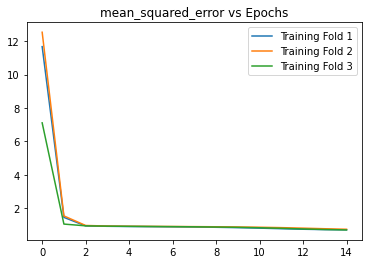

In [51]:
plt.title('mean_squared_error vs Epochs')
for i in range(k_len):
    plt.plot(kmodel_history[i][0].history['mean_squared_error'], label='Training Fold '+str(i+1)) 
plt.legend()
plt.show()

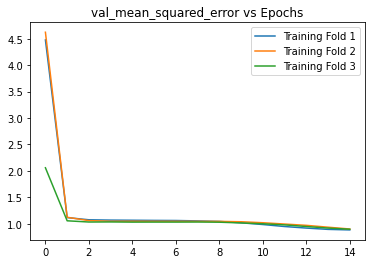

In [53]:
plt.title('val_mean_squared_error vs Epochs')
for i in range(k_len):
    plt.plot(kmodel_history[i][0].history['val_mean_squared_error'], label='Training Fold '+str(i+1)) 
plt.legend()
plt.show()

In [54]:
sum = 0
for i in range(k_len):
    last = len(kmodel_history[i][0].history['mean_squared_error'])
    sum = sum + kmodel_history[i][0].history['mean_squared_error'][last-1]
train_average = sum / len(kmodel_history)
print("train average mean_squared_error: "+ str(train_average))

train average mean_squared_error: 0.7295108040173849


In [55]:
test_sum = 0
for i in range(k_len):
    print('the test mean_squared_error at Training Fold '+str(i+1)+": "+str(kmodel_history[i][1]))
    test_sum = test_sum + kmodel_history[i][1]
print("test average mean_squared_error: "+ str(test_sum/k_len))

the test mean_squared_error at Training Fold 1: 0.8801608681678772
the test mean_squared_error at Training Fold 2: 0.8921095728874207
the test mean_squared_error at Training Fold 3: 0.9120463132858276
test average mean_squared_error: 0.8947722514470419


### split into train, validation, and test set

In [86]:
books_range = list(range(dtf_users_matrix.shape[1]))
np.random.shuffle(books_range )
split = int(0.8*dtf_users_matrix.shape[1])
print(split)

8000


In [93]:
# Train
train_range = books_range[0:split]
dtf_train = dtf_users_matrix[train_range]
print("non-null data:", dtf_train[dtf_train>0].count().sum())
dtf_train

non-null data: 783519


product,6305,9530,743,6895,4547,7634,8546,6887,1429,8790,...,3278,9828,7766,7921,8300,8543,9320,4925,76,6396
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
train = dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
train = pd.merge(train, products_with_tags, how='inner')
train


,user_id,product,y,old,thriller,comic,adult,historical,documentary,detective,...,animation,sci-fi,comedy,classics,mystery,fiction,horror,crime,action,fantasy
0,0,1179,4.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
1,34,1179,2.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,75,1179,4.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,510,1179,5.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4,958,1179,5.0,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783514,23535,7802,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783515,27390,7802,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783516,50456,7802,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
783517,52489,7802,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
hsplit = int(0.8*split)
print(hsplit)

6400


In [89]:
# train set
h_train_range = books_range[0:hsplit]
h_dtf_train = dtf_users_matrix[h_train_range]
print("non-null data:", h_dtf_train[h_dtf_train>0].count().sum())
print(h_dtf_train)
h_train = h_dtf_train.stack(dropna=True).reset_index().rename(columns={0:"y"})
h_train = pd.merge(h_train, products_with_tags, how='inner')
h_train

non-null data: 626832
product  8659  5622  4003  9079  8178  8759  4436  5127  4272  8207  ...  \
user_id                                                              ...   
0         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
53419     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
53420     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
53421     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
53422     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
53423     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   Na

,user_id,product,y,old,humour,adventure,romance,historical,drama,thriller,...,magic,musical,poetry,fantasy,mystery,western,detective,comic,documentary,crime
0,0,6284,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,282,6284,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,412,6284,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1279,6284,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1559,6284,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626827,35071,9344,5.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
626828,35590,9344,3.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
626829,37509,9344,4.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
626830,38216,9344,5.0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# validation set
h_val_range = books_range[hsplit:split]
h_dtf_val = dtf_users_matrix[h_val_range]
print("non-null data:", h_dtf_val[h_dtf_val>0].count().sum())
print(h_dtf_val)
h_val = h_dtf_val.stack(dropna=True).reset_index().rename(columns={0:"y"})
h_val = pd.merge(h_val, products_with_tags, how='inner')
h_val

non-null data: 156444
product  4539  1001  8897  1934  6137  3377  8843  2745  6014  5732  ...  \
user_id                                                              ...   
0         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
53419     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
53420     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
53421     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
53422     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
53423     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   Na

,user_id,product,y,old,humour,adventure,romance,historical,drama,thriller,...,magic,musical,poetry,fantasy,mystery,western,detective,comic,documentary,crime
0,0,1179,4.0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,34,1179,2.0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
2,75,1179,4.0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,510,1179,5.0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,958,1179,5.0,0,0,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156439,49902,5338,4.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
156440,50145,5338,5.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
156441,50191,5338,5.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
156442,51921,5338,5.0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
dtf_users[dtf_users["user_id"] == 0]

In [ ]:
train[train["user_id"] == 0]

In [91]:
# Test set
test_range = books_range[split:]
dtf_test = dtf_users_matrix[test_range]
print("non-null data:", dtf_test[dtf_test>0].count().sum())
dtf_test

non-null data: 196202


product,2849,1361,760,6379,2886,1631,5726,4478,532,3579,...,7210,1529,5125,6475,1985,7271,7870,2500,8760,3983
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0:"y"})
test = pd.merge(test, products_with_tags, how='inner')
test

,user_id,product,y,old,humour,adventure,romance,historical,drama,thriller,...,magic,musical,poetry,fantasy,mystery,western,detective,comic,documentary,crime
0,1,9761,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,976,9761,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1866,9761,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2601,9761,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2673,9761,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196197,51358,9314,2.0,0,0,1,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
196198,51550,9314,4.0,0,0,1,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
196199,52114,9314,4.0,0,0,1,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
196200,52628,9314,5.0,0,0,1,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0


In [ ]:
test[test["user_id"] == 0]

In [ ]:
dtf_users["user_id"].min(), dtf_users["user_id"].max(), dtf_users["product"].min(), dtf_users["product"].max(), dtf_products["product"].min(), dtf_products["product"].max()

In [46]:
'''
Plot loss and metrics of keras training.
'''
def utils_plot_keras_training(training):
    metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
    
    ## training
    ax[0].set(title="Training")
    ax11 = ax[0].twinx()
    ax[0].plot(training.history['loss'], color='black')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax11.plot(training.history[metric], label=metric)
    ax11.set_ylabel("Score", color='steelblue')
    ax11.legend()
    
    ## validation
    ax[1].set(title="Validation")
    ax22 = ax[1].twinx()
    ax[1].plot(training.history['val_loss'], color='black')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Loss', color='black')
    for metric in metrics:
        ax22.plot(training.history['val_'+metric], label=metric)
    ax22.set_ylabel("Score", color="steelblue")
    plt.show()

In [47]:
# Evaluate
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)

## try training a model

In [95]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
embeddings_size = 50
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
# create a model
R_model = create_model(usr, prd, feat, 'adam','relu', embeddings_size)
# train
R_training = R_model.fit(x=[train["user_id"], train["product"], train[books_genres]], y=train["y"], 
                     epochs=50, batch_size=2048, verbose=1, validation_split=0.3, callbacks=[early_stopping])

53424 10000 26
53424 10000 26
Epoch 1/50
268/268 [==============================] - 55s 148ms/step - loss: 3.2384 - mean_squared_error: 3.2384 - val_loss: 3.1292 - val_mean_squared_error: 3.1292
Epoch 2/50
268/268 [==============================] - 34s 126ms/step - loss: 0.6796 - mean_squared_error: 0.6796 - val_loss: 2.9776 - val_mean_squared_error: 2.9776
Epoch 3/50
268/268 [==============================] - 33s 123ms/step - loss: 0.5324 - mean_squared_error: 0.5324 - val_loss: 2.9059 - val_mean_squared_error: 2.9059
Epoch 4/50
268/268 [==============================] - 33s 124ms/step - loss: 0.3874 - mean_squared_error: 0.3874 - val_loss: 2.8927 - val_mean_squared_error: 2.8927
Epoch 5/50
268/268 [==============================] - 33s 122ms/step - loss: 0.2955 - mean_squared_error: 0.2955 - val_loss: 2.8575 - val_mean_squared_error: 2.8575
Epoch 6/50
268/268 [==============================] - 33s 123ms/step - loss: 0.2359 - mean_squared_error: 0.2359 - val_loss: 2.8395 - val_mean_sq

In [96]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
embeddings_size = 30
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
# create a model
R_model_1 = create_model(usr, prd, feat, 'adam','tanh', embeddings_size)
# train
R_training_1 = R_model_1.fit(x=[train["user_id"], train["product"], train[books_genres]], y=train["y"], 
                     epochs=35, batch_size=2048, verbose=1, validation_split=0.3, callbacks=[early_stopping])

53424 10000 26
53424 10000 26
Epoch 1/35
268/268 [==============================] - 31s 90ms/step - loss: 4.0150 - mean_squared_error: 4.0150 - val_loss: 2.5104 - val_mean_squared_error: 2.5104
Epoch 2/35
268/268 [==============================] - 23s 87ms/step - loss: 0.7017 - mean_squared_error: 0.7017 - val_loss: 2.4144 - val_mean_squared_error: 2.4144
Epoch 3/35
268/268 [==============================] - 23s 85ms/step - loss: 0.5457 - mean_squared_error: 0.5457 - val_loss: 2.3938 - val_mean_squared_error: 2.3938
Epoch 4/35
268/268 [==============================] - 23s 87ms/step - loss: 0.4092 - mean_squared_error: 0.4092 - val_loss: 2.3858 - val_mean_squared_error: 2.3858
Epoch 5/35
268/268 [==============================] - 23s 88ms/step - loss: 0.3245 - mean_squared_error: 0.3245 - val_loss: 2.3864 - val_mean_squared_error: 2.3864
Epoch 6/35
268/268 [==============================] - 23s 86ms/step - loss: 0.2687 - mean_squared_error: 0.2687 - val_loss: 2.4017 - val_mean_squared_

In [104]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
R_model_2 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 60)
R_training_2 = R_model_2.fit(x=[h_train["user_id"], h_train["product"], h_train[books_genres]], y=h_train["y"], epochs=50, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 26
Epoch 1/50
245/245 [==============================] - 46s 159ms/step - loss: 10.9313 - mean_squared_error: 10.9313 - val_loss: 9.0412 - val_mean_squared_error: 9.0412
Epoch 2/50
245/245 [==============================] - 36s 146ms/step - loss: 5.7657 - mean_squared_error: 5.7657 - val_loss: 5.2361 - val_mean_squared_error: 5.2361
Epoch 3/50
245/245 [==============================] - 35s 143ms/step - loss: 2.6457 - mean_squared_error: 2.6457 - val_loss: 3.1555 - val_mean_squared_error: 3.1555
Epoch 4/50
245/245 [==============================] - 35s 142ms/step - loss: 1.3368 - mean_squared_error: 1.3368 - val_loss: 2.2176 - val_mean_squared_error: 2.2176
Epoch 5/50
245/245 [==============================] - 35s 145ms/step - loss: 0.9537 - mean_squared_error: 0.9537 - val_loss: 1.8463 - val_mean_squared_error: 1.8463
Epoch 6/50
245/245 [==============================] - 35s 142ms/step - loss: 0.8417 - mean_squared_error: 0.8417 - val_loss: 1.6991 - val_mean_squared_error: 

In [108]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
R_model_3 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 60)
R_training_3 = R_model_3.fit(x=[h_train["user_id"], h_train["product"], h_train[books_genres]], y=h_train["y"], epochs=60, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 26
Epoch 1/60
245/245 [==============================] - 44s 155ms/step - loss: 14.0667 - mean_squared_error: 14.0667 - val_loss: 11.7335 - val_mean_squared_error: 11.7335
Epoch 2/60
245/245 [==============================] - 39s 158ms/step - loss: 7.9859 - mean_squared_error: 7.9859 - val_loss: 7.1398 - val_mean_squared_error: 7.1398
Epoch 3/60
245/245 [==============================] - 36s 148ms/step - loss: 4.0052 - mean_squared_error: 4.0052 - val_loss: 4.3734 - val_mean_squared_error: 4.3734
Epoch 4/60
245/245 [==============================] - 36s 149ms/step - loss: 1.9775 - mean_squared_error: 1.9775 - val_loss: 2.9197 - val_mean_squared_error: 2.9197
Epoch 5/60
245/245 [==============================] - 35s 144ms/step - loss: 1.1941 - mean_squared_error: 1.1941 - val_loss: 2.2361 - val_mean_squared_error: 2.2361
Epoch 6/60
245/245 [==============================] - 35s 144ms/step - loss: 0.9439 - mean_squared_error: 0.9439 - val_loss: 1.9327 - val_mean_squared_error

In [98]:
R_model.evaluate([test["user_id"], test["product"], test[books_genres]], test["y"])

6124/6124 [==============================] - 16s 2ms/step - loss: 1.5116 - mean_squared_error: 1.5116


[1.5116126537322998, 1.5116126537322998]

In [99]:
R_model_1.evaluate([test["user_id"], test["product"], test[books_genres]], test["y"])

6124/6124 [==============================] - 16s 2ms/step - loss: 1.8713 - mean_squared_error: 1.8713


[1.8713241815567017, 1.8713241815567017]

In [105]:
R_model_2.evaluate([test["user_id"], test["product"], test[books_genres]], test["y"])

6124/6124 [==============================] - 14s 2ms/step - loss: 1.3460 - mean_squared_error: 1.3460


[1.3460047245025635, 1.3460047245025635]

In [111]:
R_model_3.evaluate([test["user_id"], test["product"], test[books_genres]], test["y"])

6124/6124 [==============================] - 15s 2ms/step - loss: 1.3785 - mean_squared_error: 1.3785


[1.3785064220428467, 1.3785064220428467]

No handles with labels found to put in legend.


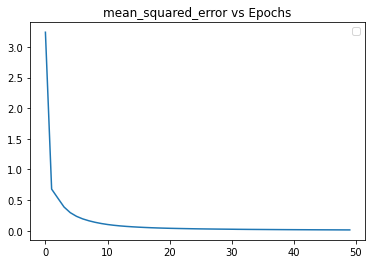

In [100]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training.history['mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


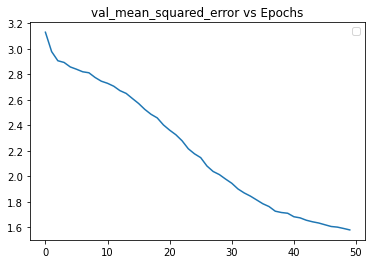

In [101]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training.history['val_mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


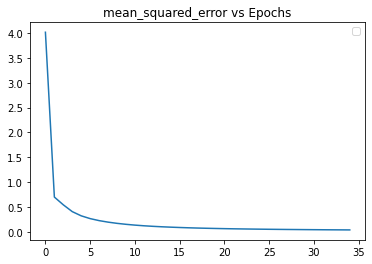

In [102]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_1.history['mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


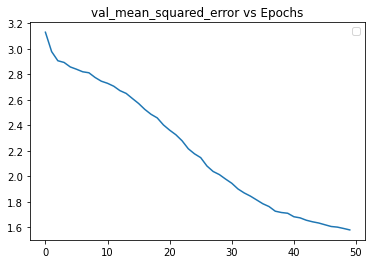

In [103]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training.history['val_mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


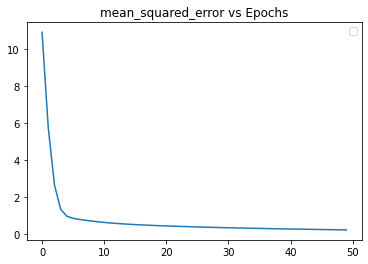

In [106]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_2.history['mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


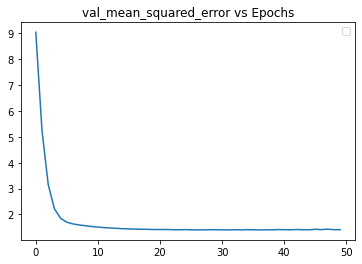

In [107]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_2.history['val_mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


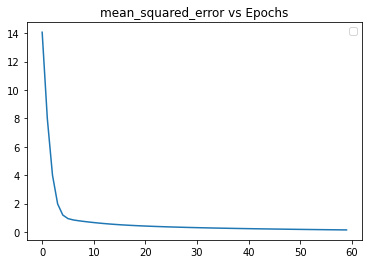

In [109]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_3.history['mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


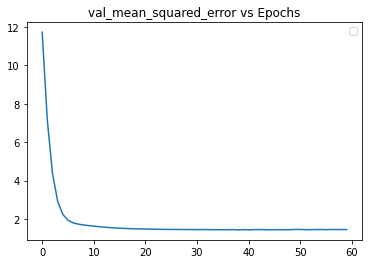

In [110]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_3.history['val_mean_squared_error']) 
plt.legend()
plt.show()

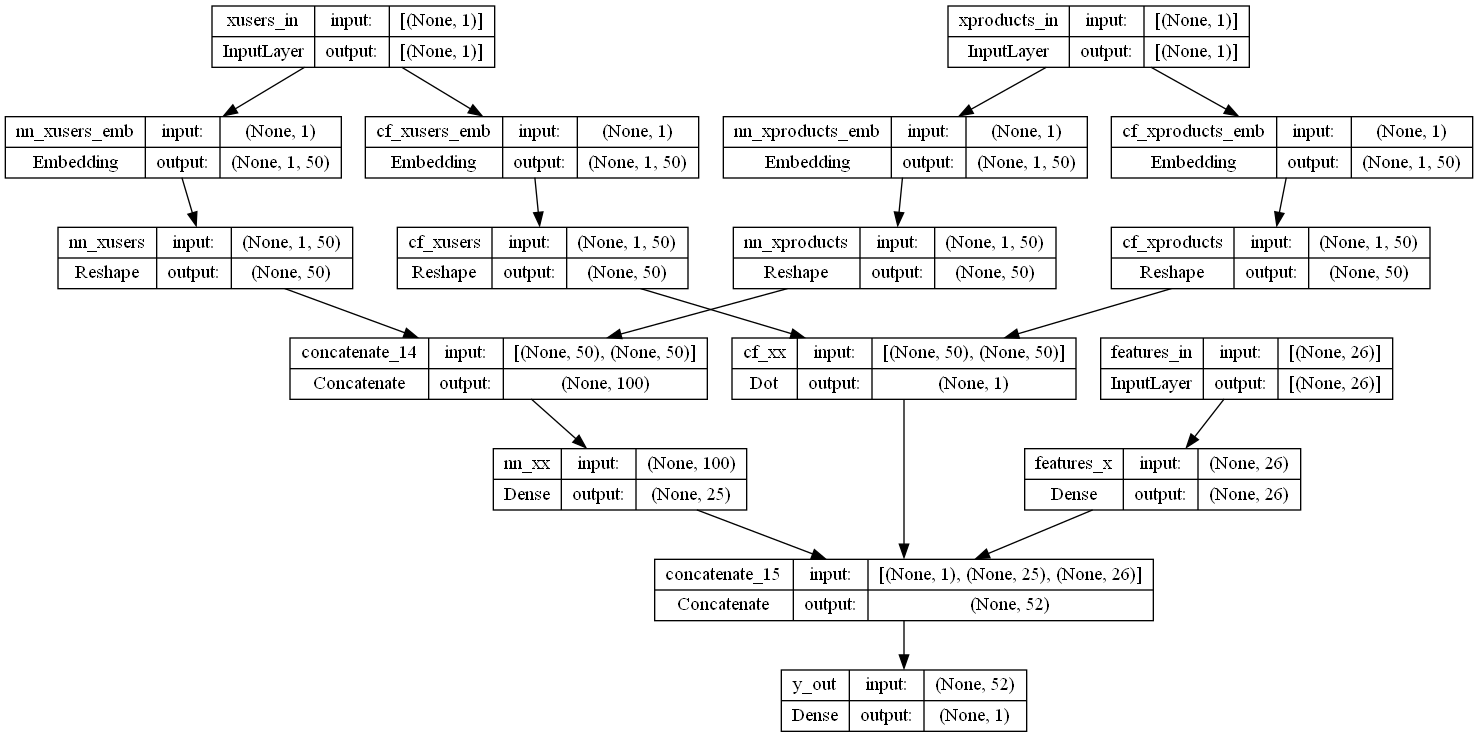

In [72]:
utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

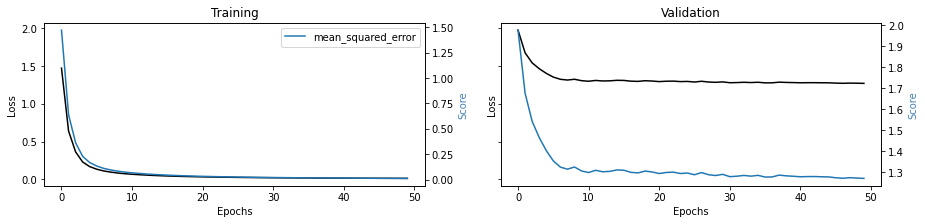

In [73]:
model = training.model
utils_plot_keras_training(training)

In [74]:
# test
test["yhat"] = model.predict([test["user_id"], test["product"], test[books_genres]])
test

5878/5878 [==============================] - 16s 2ms/step


,user_id,product,y,old,detective,adult,magic,comedy,fantasy,drama,...,action,musical,children,humour,thriller,animation,horror,comic,sci-fi,yhat
0,1,8033,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.315345
1,1702,8033,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.097774
2,1856,8033,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.254510
3,2976,8033,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.804492
4,4061,8033,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.078577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188075,35071,9344,5.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.601585
188076,35590,9344,3.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.892166
188077,37509,9344,4.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,3.698557
188078,38216,9344,5.0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1.973539


In [75]:
# overall
y_test = test["y"]
predicted = test["yhat"]

print("Mean Absolute Error (Σ|y-pred|/n):", "{:,.0f}".format(metrics.mean_absolute_error(y_test, predicted)))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", str(round(np.mean(np.abs((y_test-predicted)/predicted)), 2))+"%")

Mean Absolute Error (Σ|y-pred|/n): 1
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.26%


In [77]:
model.evaluate([test["user_id"], test["product"], test[books_genres]], test["y"])

5878/5878 [==============================] - 16s 2ms/step - loss: 1.2777 - mean_squared_error: 1.2777


[1.277726411819458, 1.277726411819458]

In [76]:
# single case
i = 344
print("--- user", i, "---")

top = 5
y_test = test[test["user_id"]==i].sort_values("y", ascending=False)["product"].values[:top]
print("y_test:", y_test)

predicted = test[test["user_id"]==i].sort_values("yhat", ascending=False)["product"].values[:top]
print("predicted:", predicted)

true_positive = len(list(set(y_test) & set(predicted)))
print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
print("accuracy:", str(round(metrics.accuracy_score(y_test,predicted)*100,1))+"%")
print("mrr:", round(mean_reciprocal_rank(y_test, predicted),2))

--- user 344 ---
y_test: [8415 8456 9638 9758 9549]
predicted: [9758 9638 8415 9169 9549]
true positive: 4 (80.0%)
accuracy: 20.0%
mrr: 0.41


In [ ]:
test[test["user_id"] == 344]

In [78]:
model.save('normal.h5')

In [80]:
normal_model = keras.models.load_model('normal.h5')

In [81]:
normal_model.evaluate([test["user_id"], test["product"], test[books_genres]], test["y"])

5878/5878 [==============================] - 15s 2ms/step - loss: 1.2777 - mean_squared_error: 1.2777


[1.277726411819458, 1.277726411819458]

In [72]:
features = dtf_users.loc[:, dtf_users.columns != 'y']
target = dtf_users['y']

In [73]:
features

,user_id,product,old,music,sports,crime,biography,nonfiction,religion,spirituality,...,thriller,mystery,psychology,manga,poetry,horror,paranormal,travel,philosophy,suspense
0,0,257,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,10,257,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
2,142,257,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
3,241,257,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
4,324,257,0,0,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976474,36772,9547,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5976475,50672,9547,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5976476,45212,9547,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5976477,12871,9547,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
target

0          5
1          3
2          4
3          5
4          4
          ..
5976474    5
5976475    4
5976476    3
5976477    4
5976478    5
Name: y, Length: 5976479, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test  = train_test_split(features, target ,random_state=104, test_size=0.2, shuffle=True)

In [76]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((4781183, 34), (1195296, 34), (4781183,), (1195296,))

### Manual hyperparameter tuning

In [57]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_5 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 30)
R_training_5 = R_model_5.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=20, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 32
53424 10000 32
Epoch 1/20
1868/1868 [==============================] - 227s 106ms/step - loss: 6.0739 - mean_squared_error: 6.0739 - val_loss: 1.0485 - val_mean_squared_error: 1.0485
Epoch 2/20
1868/1868 [==============================] - 143s 77ms/step - loss: 0.9302 - mean_squared_error: 0.9302 - val_loss: 0.8630 - val_mean_squared_error: 0.8630
Epoch 3/20
1868/1868 [==============================] - 137s 73ms/step - loss: 0.7923 - mean_squared_error: 0.7923 - val_loss: 0.7719 - val_mean_squared_error: 0.7719
Epoch 4/20
1868/1868 [==============================] - 139s 74ms/step - loss: 0.7010 - mean_squared_error: 0.7010 - val_loss: 0.7436 - val_mean_squared_error: 0.7436
Epoch 5/20
1868/1868 [==============================] - 139s 75ms/step - loss: 0.6530 - mean_squared_error: 0.6530 - val_loss: 0.7379 - val_mean_squared_error: 0.7379
Epoch 6/20
1868/1868 [==============================] - 143s 77ms/step - loss: 0.6148 - mean_squared_error: 0.6148 - val_loss: 0.7359 

KeyboardInterrupt: 

**I stopped the training becuase there was signs of overfitting**

#### first model

In [58]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_5 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 20)
R_training_5 = R_model_5.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=20, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 32
53424 10000 32
Epoch 1/20
1868/1868 [==============================] - 110s 49ms/step - loss: 12.2431 - mean_squared_error: 12.2431 - val_loss: 2.3895 - val_mean_squared_error: 2.3895
Epoch 2/20
1868/1868 [==============================] - 92s 49ms/step - loss: 1.3068 - mean_squared_error: 1.3068 - val_loss: 1.0418 - val_mean_squared_error: 1.0418
Epoch 3/20
1868/1868 [==============================] - 91s 48ms/step - loss: 0.9838 - mean_squared_error: 0.9838 - val_loss: 0.9449 - val_mean_squared_error: 0.9449
Epoch 4/20
1868/1868 [==============================] - 90s 48ms/step - loss: 0.8597 - mean_squared_error: 0.8597 - val_loss: 0.8358 - val_mean_squared_error: 0.8358
Epoch 5/20
1868/1868 [==============================] - 90s 48ms/step - loss: 0.7302 - mean_squared_error: 0.7302 - val_loss: 0.7658 - val_mean_squared_error: 0.7658
Epoch 6/20
1868/1868 [==============================] - 90s 48ms/step - loss: 0.6644 - mean_squared_error: 0.6644 - val_loss: 0.7543 - va

KeyboardInterrupt: 

**I stopped the training becuase there was signs of overfitting**

#### second model

In [66]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_5 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 5)
R_training_5 = R_model_5.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=20, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 32
53424 10000 32
Epoch 1/20
1868/1868 [==============================] - 44s 19ms/step - loss: 5.7638 - mean_squared_error: 5.7638 - val_loss: 1.2883 - val_mean_squared_error: 1.2883
Epoch 2/20
1868/1868 [==============================] - 32s 17ms/step - loss: 1.1276 - mean_squared_error: 1.1276 - val_loss: 1.0658 - val_mean_squared_error: 1.0658
Epoch 3/20
1868/1868 [==============================] - 33s 17ms/step - loss: 1.0206 - mean_squared_error: 1.0206 - val_loss: 0.9846 - val_mean_squared_error: 0.9846
Epoch 4/20
1868/1868 [==============================] - 35s 19ms/step - loss: 0.9433 - mean_squared_error: 0.9433 - val_loss: 0.9196 - val_mean_squared_error: 0.9196
Epoch 5/20
1868/1868 [==============================] - 33s 17ms/step - loss: 0.8670 - mean_squared_error: 0.8670 - val_loss: 0.8594 - val_mean_squared_error: 0.8594
Epoch 6/20
1868/1868 [==============================] - 33s 18ms/step - loss: 0.7908 - mean_squared_error: 0.7908 - val_loss: 0.8053 - val_m

In [68]:
R_model_5.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

37353/37353 [==============================] - 83s 2ms/step - loss: 0.7275 - mean_squared_error: 0.7275


[0.7274876832962036, 0.7274876832962036]

No handles with labels found to put in legend.


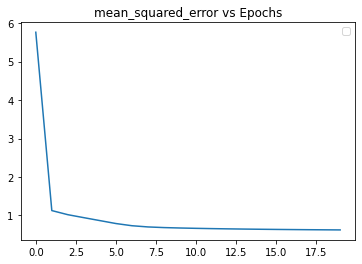

In [69]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_5.history['mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


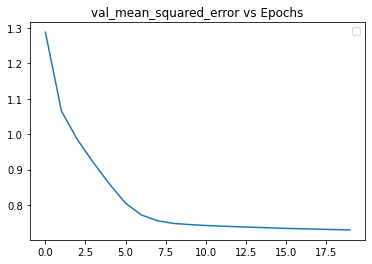

In [70]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_5.history['val_mean_squared_error']) 
plt.legend()
plt.show()

#### Third model

In [71]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_6 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 5)
R_training_6 = R_model_6.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=30, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 32
53424 10000 32
Epoch 1/30
1868/1868 [==============================] - 45s 19ms/step - loss: 4.0209 - mean_squared_error: 4.0209 - val_loss: 1.1368 - val_mean_squared_error: 1.1368
Epoch 2/30
1868/1868 [==============================] - 34s 18ms/step - loss: 1.0715 - mean_squared_error: 1.0715 - val_loss: 1.0335 - val_mean_squared_error: 1.0335
Epoch 3/30
1868/1868 [==============================] - 34s 18ms/step - loss: 1.0037 - mean_squared_error: 1.0037 - val_loss: 0.9859 - val_mean_squared_error: 0.9859
Epoch 4/30
1868/1868 [==============================] - 34s 18ms/step - loss: 0.9528 - mean_squared_error: 0.9528 - val_loss: 0.9351 - val_mean_squared_error: 0.9351
Epoch 5/30
1868/1868 [==============================] - 33s 18ms/step - loss: 0.8765 - mean_squared_error: 0.8765 - val_loss: 0.8662 - val_mean_squared_error: 0.8662
Epoch 6/30
1868/1868 [==============================] - 35s 19ms/step - loss: 0.7930 - mean_squared_error: 0.7930 - val_loss: 0.8083 - val_m

In [72]:
R_model_6.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

37353/37353 [==============================] - 79s 2ms/step - loss: 0.7233 - mean_squared_error: 0.7233


[0.7233147025108337, 0.7233147025108337]

No handles with labels found to put in legend.


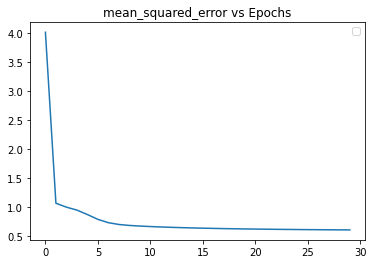

In [73]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_6.history['mean_squared_error']) 
plt.legend()
plt.show()

No handles with labels found to put in legend.


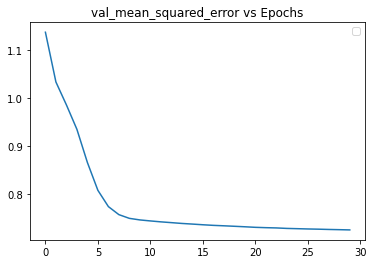

In [74]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_6.history['val_mean_squared_error']) 
plt.legend()
plt.show()

#### forth model

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_7 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 5)
R_training_7 = R_model_7.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=40, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 32
53424 10000 32
Epoch 1/40
1868/1868 [==============================] - 82s 18ms/step - loss: 5.5480 - mean_squared_error: 5.5480 - val_loss: 1.2627 - val_mean_squared_error: 1.2627
Epoch 2/40
1868/1868 [==============================] - 33s 18ms/step - loss: 1.0913 - mean_squared_error: 1.0913 - val_loss: 1.0302 - val_mean_squared_error: 1.0302
Epoch 3/40
1868/1868 [==============================] - 30s 16ms/step - loss: 0.9860 - mean_squared_error: 0.9860 - val_loss: 0.9526 - val_mean_squared_error: 0.9526
Epoch 4/40
1868/1868 [==============================] - 31s 16ms/step - loss: 0.9140 - mean_squared_error: 0.9140 - val_loss: 0.8945 - val_mean_squared_error: 0.8945
Epoch 5/40
1868/1868 [==============================] - 32s 17ms/step - loss: 0.8461 - mean_squared_error: 0.8461 - val_loss: 0.8413 - val_mean_squared_error: 0.8413
Epoch 6/40
1868/1868 [==============================] - 34s 18ms/step - loss: 0.7781 - mean_squared_error: 0.7781 - val_loss: 0.7953 - val_m

In [ ]:
R_model_7.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

In [ ]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_7.history['mean_squared_error']) 
plt.legend()
plt.show()

In [ ]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_7.history['val_mean_squared_error']) 
plt.legend()
plt.show()

**validation loss is less than training loss at first epochs, so let's add regularization**

In [39]:
# model with Regularization
# model
def create_model_with_reg(usr, prd, feat, optimizer='adam', activation='relu', embeddings_size = 50):
    print(usr, prd, feat)
    ########################################## COLLABORATIVE FILTERING ###################################################
    # Input layer
    xusers_in = layers.Input(name="xusers_in", shape=(1,))
    xproducts_in = layers.Input(name="xproducts_in", shape=(1,))

    # A) Matrix Factorization
    ## embeddings and reshape
    cf_xusers_emb = layers.Embedding(name="cf_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
    cf_xusers = layers.Reshape(name='cf_xusers', target_shape=(embeddings_size,))(cf_xusers_emb)
    ## embeddings and reshape
    cf_xproducts_emb = layers.Embedding(name="cf_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
    cf_xproducts = layers.Reshape(name='cf_xproducts', target_shape=(embeddings_size,))(cf_xproducts_emb)
    ## product
    cf_xx = layers.Dot(name='cf_xx', normalize=True, axes=1)([cf_xusers, cf_xproducts])

    # B) Neural Network
    ## embeddings and reshape
    nn_xusers_emb = layers.Embedding(name="nn_xusers_emb", input_dim=usr, output_dim=embeddings_size)(xusers_in)
    nn_xusers = layers.Reshape(name='nn_xusers', target_shape=(embeddings_size,))(nn_xusers_emb)
    ## embeddings and reshape
    nn_xproducts_emb = layers.Embedding(name="nn_xproducts_emb", input_dim=prd, output_dim=embeddings_size)(xproducts_in)
    nn_xproducts = layers.Reshape(name='nn_xproducts', target_shape=(embeddings_size,))(nn_xproducts_emb)
    ## concat and dense
    nn_xx = layers.Concatenate()([nn_xusers, nn_xproducts])
    nn_xx = layers.Dense(name="nn_xx", units=int(embeddings_size/2), activation=activation, kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01))(nn_xx)

    ########################################## CONTENT BASED ###################################################
    # Product Features
    features_in = layers.Input(name="features_in", shape=(feat,))
    features_x = layers.Dense(name="features_x", units=feat, activation=activation, kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01))(features_in)

    ########################################## OUTPUT ###################################################
    # Merge all
    y_out = layers.Concatenate()([cf_xx, nn_xx, features_x])
    y_out = layers.Dense(name="y_out", units=1, activation='linear', kernel_initializer="he_normal",kernel_regularizer=keras.regularizers.l2(0.01))(y_out)

    # Compile
    model = models.Model(inputs=[xusers_in,xproducts_in, features_in], outputs=y_out, name="Hybrid_Model")
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

### try different embedding sizes

#### fifth model

In [47]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_8 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 5)
R_training_8 = R_model_8.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=40, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 31
53424 10000 31
Epoch 1/40
1868/1868 [==============================] - 38s 16ms/step - loss: 10.4526 - mean_squared_error: 9.8187 - val_loss: 2.7545 - val_mean_squared_error: 2.1542
Epoch 2/40
1868/1868 [==============================] - 26s 14ms/step - loss: 1.8223 - mean_squared_error: 1.3206 - val_loss: 1.4878 - val_mean_squared_error: 1.0977
Epoch 3/40
1868/1868 [==============================] - 25s 14ms/step - loss: 1.3441 - mean_squared_error: 1.0446 - val_loss: 1.2299 - val_mean_squared_error: 1.0086
Epoch 4/40
1868/1868 [==============================] - 28s 15ms/step - loss: 1.1171 - mean_squared_error: 0.9531 - val_loss: 1.0606 - val_mean_squared_error: 0.9450
Epoch 5/40
1868/1868 [==============================] - 28s 15ms/step - loss: 0.9621 - mean_squared_error: 0.8775 - val_loss: 0.9517 - val_mean_squared_error: 0.8910
Epoch 6/40
1868/1868 [==============================] - 29s 15ms/step - loss: 0.8642 - mean_squared_error: 0.8160 - val_loss: 0.8869 - val_

37353/37353 [==============================] - 83s 2ms/step - loss: 0.7374 - mean_squared_error: 0.7124


No handles with labels found to put in legend.


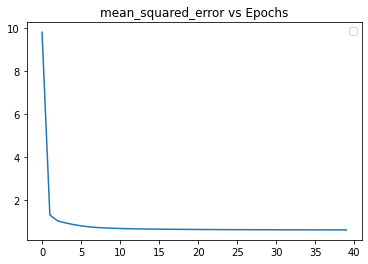

No handles with labels found to put in legend.


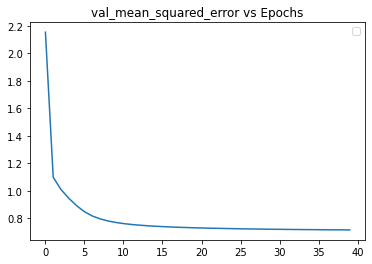

In [48]:
R_model_8.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_8.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_8.history['val_mean_squared_error']) 
plt.legend()
plt.show()

#### sixth model

In [49]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_9 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 5)
R_training_9 = R_model_9.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=60, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 31
53424 10000 31
Epoch 1/60
1868/1868 [==============================] - 56s 19ms/step - loss: 8.2404 - mean_squared_error: 7.6414 - val_loss: 2.2379 - val_mean_squared_error: 1.6909
Epoch 2/60
1868/1868 [==============================] - 33s 17ms/step - loss: 1.6446 - mean_squared_error: 1.2028 - val_loss: 1.4072 - val_mean_squared_error: 1.0717
Epoch 3/60
1868/1868 [==============================] - 35s 19ms/step - loss: 1.2844 - mean_squared_error: 1.0297 - val_loss: 1.1895 - val_mean_squared_error: 1.0036
Epoch 4/60
1868/1868 [==============================] - 33s 18ms/step - loss: 1.1163 - mean_squared_error: 0.9786 - val_loss: 1.0681 - val_mean_squared_error: 0.9691
Epoch 5/60
1868/1868 [==============================] - 34s 18ms/step - loss: 1.0185 - mean_squared_error: 0.9416 - val_loss: 1.0043 - val_mean_squared_error: 0.9428
Epoch 6/60
1868/1868 [==============================] - 32s 17ms/step - loss: 0.9455 - mean_squared_error: 0.8895 - val_loss: 0.9505 - val_m

Epoch 50/60
1868/1868 [==============================] - 34s 18ms/step - loss: 0.6444 - mean_squared_error: 0.6184 - val_loss: 0.7330 - val_mean_squared_error: 0.7072
Epoch 51/60
1868/1868 [==============================] - 34s 18ms/step - loss: 0.6440 - mean_squared_error: 0.6181 - val_loss: 0.7325 - val_mean_squared_error: 0.7069
Epoch 52/60
1868/1868 [==============================] - 34s 18ms/step - loss: 0.6436 - mean_squared_error: 0.6177 - val_loss: 0.7324 - val_mean_squared_error: 0.7067
Epoch 53/60
1868/1868 [==============================] - 33s 18ms/step - loss: 0.6432 - mean_squared_error: 0.6174 - val_loss: 0.7320 - val_mean_squared_error: 0.7065
Epoch 54/60
1868/1868 [==============================] - 33s 18ms/step - loss: 0.6429 - mean_squared_error: 0.6171 - val_loss: 0.7317 - val_mean_squared_error: 0.7061
Epoch 55/60
1868/1868 [==============================] - 34s 18ms/step - loss: 0.6425 - mean_squared_error: 0.6168 - val_loss: 0.7314 - val_mean_squared_error: 0.705

37353/37353 [==============================] - 83s 2ms/step - loss: 0.7275 - mean_squared_error: 0.7023


No handles with labels found to put in legend.


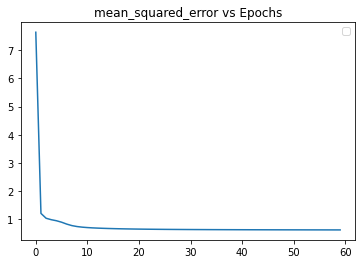

No handles with labels found to put in legend.


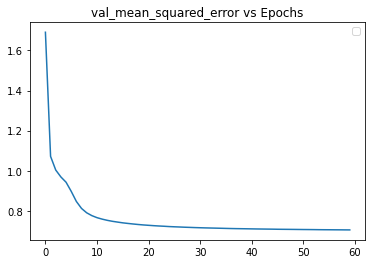

In [50]:
R_model_9.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_9.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_9.history['val_mean_squared_error']) 
plt.legend()
plt.show()

#### seventh model

In [51]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_10 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 10)
R_training_10 = R_model_10.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=60, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 31
53424 10000 31
Epoch 1/60
1868/1868 [==============================] - 66s 30ms/step - loss: 9.5693 - mean_squared_error: 8.8945 - val_loss: 2.4875 - val_mean_squared_error: 1.8505
Epoch 2/60
1868/1868 [==============================] - 54s 29ms/step - loss: 1.7224 - mean_squared_error: 1.1993 - val_loss: 1.4356 - val_mean_squared_error: 1.0343
Epoch 3/60
1868/1868 [==============================] - 55s 29ms/step - loss: 1.3034 - mean_squared_error: 0.9959 - val_loss: 1.2005 - val_mean_squared_error: 0.9728
Epoch 4/60
1868/1868 [==============================] - 56s 30ms/step - loss: 1.1004 - mean_squared_error: 0.9281 - val_loss: 1.0449 - val_mean_squared_error: 0.9179
Epoch 5/60
1868/1868 [==============================] - 56s 30ms/step - loss: 0.9392 - mean_squared_error: 0.8402 - val_loss: 0.9291 - val_mean_squared_error: 0.8517
Epoch 6/60
1868/1868 [==============================] - 55s 30ms/step - loss: 0.8294 - mean_squared_error: 0.7633 - val_loss: 0.8652 - val_m

Epoch 50/60
1868/1868 [==============================] - 56s 30ms/step - loss: 0.5768 - mean_squared_error: 0.5368 - val_loss: 0.7642 - val_mean_squared_error: 0.7248
Epoch 51/60
1868/1868 [==============================] - 55s 30ms/step - loss: 0.5763 - mean_squared_error: 0.5363 - val_loss: 0.7641 - val_mean_squared_error: 0.7246
Epoch 52/60
1868/1868 [==============================] - 56s 30ms/step - loss: 0.5758 - mean_squared_error: 0.5358 - val_loss: 0.7637 - val_mean_squared_error: 0.7244
Epoch 53/60
1868/1868 [==============================] - 57s 30ms/step - loss: 0.5753 - mean_squared_error: 0.5353 - val_loss: 0.7636 - val_mean_squared_error: 0.7241
Epoch 54/60
1868/1868 [==============================] - 54s 29ms/step - loss: 0.5748 - mean_squared_error: 0.5348 - val_loss: 0.7634 - val_mean_squared_error: 0.7240
Epoch 55/60
1868/1868 [==============================] - 55s 29ms/step - loss: 0.5743 - mean_squared_error: 0.5344 - val_loss: 0.7633 - val_mean_squared_error: 0.723

37353/37353 [==============================] - 83s 2ms/step - loss: 0.7609 - mean_squared_error: 0.7215


No handles with labels found to put in legend.


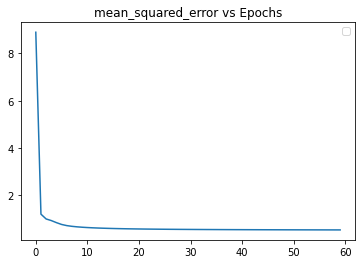

No handles with labels found to put in legend.


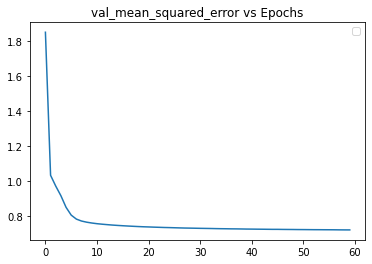

In [52]:
R_model_10.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_10.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_10.history['val_mean_squared_error']) 
plt.legend()
plt.show()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_11 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 5)
R_training_11 = R_model_11.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=70, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
R_model_11.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_11.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_11.history['val_mean_squared_error']) 
plt.legend()
plt.show()

#### Eighth model

In [81]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_18 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 10)
R_training_18 = R_model_18.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=30, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 31
53424 10000 31
Epoch 1/30
1868/1868 [==============================] - 100s 35ms/step - loss: 5.2579 - mean_squared_error: 5.2579 - val_loss: 1.1895 - val_mean_squared_error: 1.1895
Epoch 2/30
1868/1868 [==============================] - 59s 31ms/step - loss: 1.0659 - mean_squared_error: 1.0659 - val_loss: 1.0019 - val_mean_squared_error: 1.0019
Epoch 3/30
1868/1868 [==============================] - 58s 31ms/step - loss: 0.9485 - mean_squared_error: 0.9485 - val_loss: 0.9125 - val_mean_squared_error: 0.9125
Epoch 4/30
1868/1868 [==============================] - 60s 32ms/step - loss: 0.8537 - mean_squared_error: 0.8537 - val_loss: 0.8342 - val_mean_squared_error: 0.8342
Epoch 5/30
1868/1868 [==============================] - 57s 31ms/step - loss: 0.7560 - mean_squared_error: 0.7560 - val_loss: 0.7747 - val_mean_squared_error: 0.7747
Epoch 6/30
1868/1868 [==============================] - 64s 34ms/step - loss: 0.6952 - mean_squared_error: 0.6952 - val_loss: 0.7596 - val_

37353/37353 [==============================] - 86s 2ms/step - loss: 0.7620 - mean_squared_error: 0.7620


No handles with labels found to put in legend.


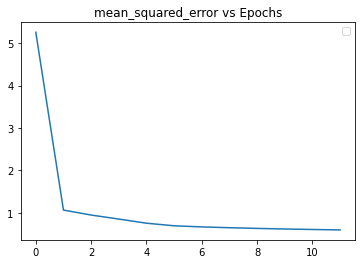

No handles with labels found to put in legend.


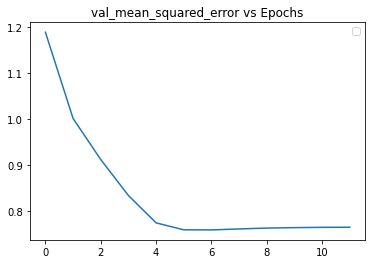

In [82]:
R_model_18.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_18.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_18.history['val_mean_squared_error']) 
plt.legend()
plt.show()

#### ningth model

In [84]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_19 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 20)
R_training_19 = R_model_19.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=30, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 31
53424 10000 31
Epoch 1/30
1868/1868 [==============================] - 137s 56ms/step - loss: 9.0863 - mean_squared_error: 9.0863 - val_loss: 1.5505 - val_mean_squared_error: 1.5505
Epoch 2/30
1868/1868 [==============================] - 100s 53ms/step - loss: 1.0944 - mean_squared_error: 1.0944 - val_loss: 0.9690 - val_mean_squared_error: 0.9690
Epoch 3/30
1868/1868 [==============================] - 96s 51ms/step - loss: 0.9015 - mean_squared_error: 0.9015 - val_loss: 0.8613 - val_mean_squared_error: 0.8613
Epoch 4/30
1868/1868 [==============================] - 99s 53ms/step - loss: 0.7830 - mean_squared_error: 0.7830 - val_loss: 0.7814 - val_mean_squared_error: 0.7814
Epoch 5/30
1868/1868 [==============================] - 99s 53ms/step - loss: 0.6964 - mean_squared_error: 0.6964 - val_loss: 0.7533 - val_mean_squared_error: 0.7533
Epoch 6/30
1868/1868 [==============================] - 102s 55ms/step - loss: 0.6519 - mean_squared_error: 0.6519 - val_loss: 0.7498 - va

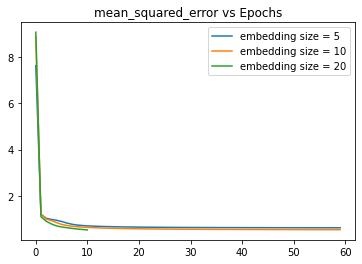

In [85]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_9.history['mean_squared_error'], label='embedding size = 5')  
plt.plot(R_training_10.history['mean_squared_error'], label='embedding size = 10') 
plt.plot(R_training_19.history['mean_squared_error'], label='embedding size = 20')
plt.legend()
plt.show()

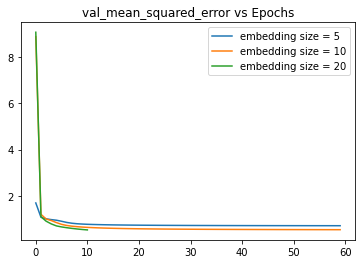

In [86]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_9.history['val_mean_squared_error'], label='embedding size = 5') 
plt.plot(R_training_10.history['val_mean_squared_error'], label='embedding size = 10')
plt.plot(R_training_19.history['val_mean_squared_error'], label='embedding size = 20')
plt.legend()
plt.show()

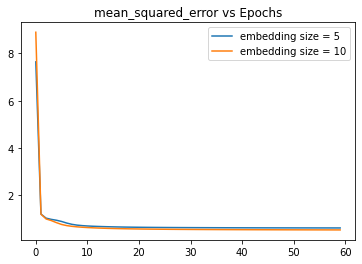

In [77]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_9.history['mean_squared_error'], label='embedding size = 5') 
plt.plot(R_training_10.history['mean_squared_error'], label='embedding size = 10') 
plt.legend()
plt.show()

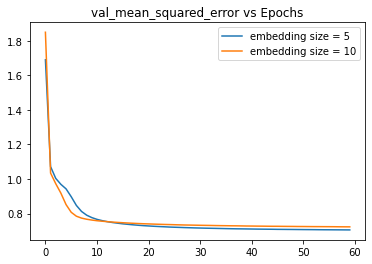

In [78]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_9.history['val_mean_squared_error'], label='embedding size = 5') 
plt.plot(R_training_10.history['val_mean_squared_error'], label='embedding size = 10') 
plt.legend()
plt.show()

### try different learning rates

#### tenth model

In [77]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_20 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 5)
R_training_20 = R_model_20.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=40, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 31
53424 10000 31
Epoch 1/40
1868/1868 [==============================] - 106s 44ms/step - loss: 10.3275 - mean_squared_error: 9.7290 - val_loss: 2.9430 - val_mean_squared_error: 2.3846
Epoch 2/40
1868/1868 [==============================] - 64s 35ms/step - loss: 1.8409 - mean_squared_error: 1.3777 - val_loss: 1.4572 - val_mean_squared_error: 1.1000
Epoch 3/40
1868/1868 [==============================] - 47s 25ms/step - loss: 1.3316 - mean_squared_error: 1.0623 - val_loss: 1.2292 - val_mean_squared_error: 1.0345
Epoch 4/40
1868/1868 [==============================] - 44s 24ms/step - loss: 1.1515 - mean_squared_error: 1.0098 - val_loss: 1.0956 - val_mean_squared_error: 0.9977
Epoch 5/40
1868/1868 [==============================] - 39s 21ms/step - loss: 1.0386 - mean_squared_error: 0.9677 - val_loss: 1.0171 - val_mean_squared_error: 0.9666
Epoch 6/40
1868/1868 [==============================] - 35s 19ms/step - loss: 0.9512 - mean_squared_error: 0.9109 - val_loss: 0.9528 - val

#### eleven model

In [78]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_21 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.001), 'sigmoid', 5)
R_training_21 = R_model_21.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=40, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 31
53424 10000 31
Epoch 1/40
1868/1868 [==============================] - 74s 26ms/step - loss: 1.5934 - mean_squared_error: 1.3976 - val_loss: 0.9884 - val_mean_squared_error: 0.9149
Epoch 2/40
1868/1868 [==============================] - 45s 24ms/step - loss: 0.8905 - mean_squared_error: 0.8166 - val_loss: 0.8263 - val_mean_squared_error: 0.7599
Epoch 3/40
1868/1868 [==============================] - 40s 22ms/step - loss: 0.7739 - mean_squared_error: 0.7142 - val_loss: 0.7899 - val_mean_squared_error: 0.7348
Epoch 4/40
1868/1868 [==============================] - 36s 19ms/step - loss: 0.7322 - mean_squared_error: 0.6806 - val_loss: 0.7757 - val_mean_squared_error: 0.7269
Epoch 5/40
1868/1868 [==============================] - 39s 21ms/step - loss: 0.7105 - mean_squared_error: 0.6636 - val_loss: 0.7673 - val_mean_squared_error: 0.7221
Epoch 6/40
1868/1868 [==============================] - 35s 19ms/step - loss: 0.6972 - mean_squared_error: 0.6531 - val_loss: 0.7622 - val_m

#### twelve model

In [79]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_22 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.01), 'sigmoid', 5)
R_training_22 = R_model_22.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=40, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

53424 10000 31
53424 10000 31
Epoch 1/40
1868/1868 [==============================] - 60s 25ms/step - loss: 0.9039 - mean_squared_error: 0.8354 - val_loss: 0.7811 - val_mean_squared_error: 0.7425
Epoch 2/40
1868/1868 [==============================] - 48s 25ms/step - loss: 0.7680 - mean_squared_error: 0.7330 - val_loss: 0.7693 - val_mean_squared_error: 0.7372
Epoch 3/40
1868/1868 [==============================] - 36s 19ms/step - loss: 0.7585 - mean_squared_error: 0.7291 - val_loss: 0.7640 - val_mean_squared_error: 0.7376
Epoch 4/40
1868/1868 [==============================] - 35s 19ms/step - loss: 0.7519 - mean_squared_error: 0.7258 - val_loss: 0.7587 - val_mean_squared_error: 0.7341
Epoch 5/40
1868/1868 [==============================] - 36s 19ms/step - loss: 0.7251 - mean_squared_error: 0.7004 - val_loss: 0.7546 - val_mean_squared_error: 0.7306
Epoch 6/40
1868/1868 [==============================] - 39s 21ms/step - loss: 0.6974 - mean_squared_error: 0.6734 - val_loss: 0.7530 - val_m

37353/37353 [==============================] - 115s 3ms/step - loss: 0.7327 - mean_squared_error: 0.7090


No handles with labels found to put in legend.


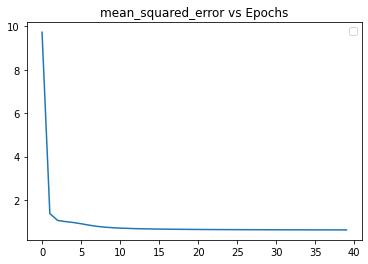

No handles with labels found to put in legend.


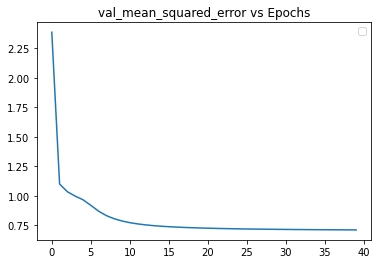

In [82]:
R_model_20.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_20.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_20.history['val_mean_squared_error']) 
plt.legend()
plt.show()

37353/37353 [==============================] - 105s 3ms/step - loss: 0.7297 - mean_squared_error: 0.7020


No handles with labels found to put in legend.


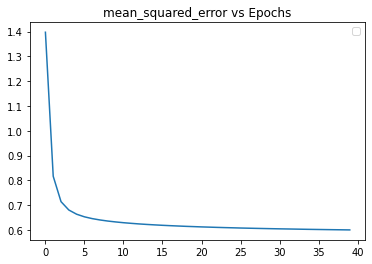

No handles with labels found to put in legend.


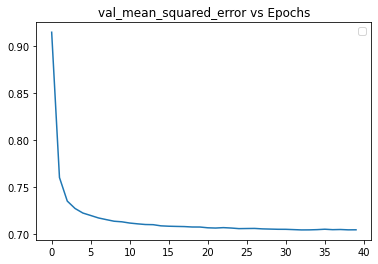

In [83]:
R_model_21.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_21.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_21.history['val_mean_squared_error']) 
plt.legend()
plt.show()

37353/37353 [==============================] - 109s 3ms/step - loss: 0.7326 - mean_squared_error: 0.7133


No handles with labels found to put in legend.


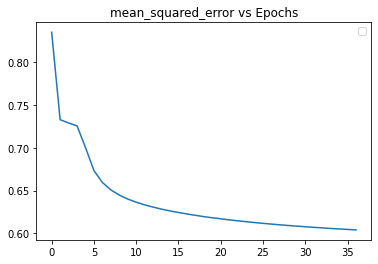

No handles with labels found to put in legend.


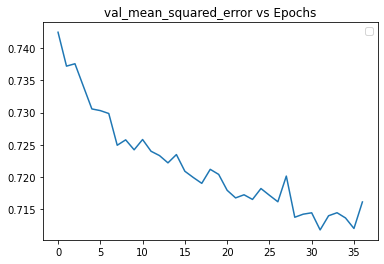

In [84]:
R_model_22.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_22.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_22.history['val_mean_squared_error']) 
plt.legend()
plt.show()

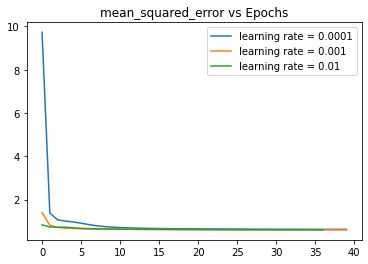

In [80]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_20.history['mean_squared_error'], label='learning rate = 0.0001') 
plt.plot(R_training_21.history['mean_squared_error'], label='learning rate = 0.001')
plt.plot(R_training_22.history['mean_squared_error'], label='learning rate = 0.01')
plt.legend()
plt.show()

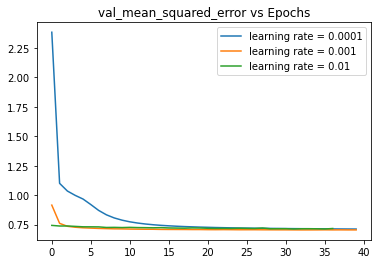

In [81]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_20.history['val_mean_squared_error'], label='learning rate = 0.0001') 
plt.plot(R_training_21.history['val_mean_squared_error'], label='learning rate = 0.001')
plt.plot(R_training_22.history['val_mean_squared_error'], label='learning rate = 0.01')
plt.legend()
plt.show()

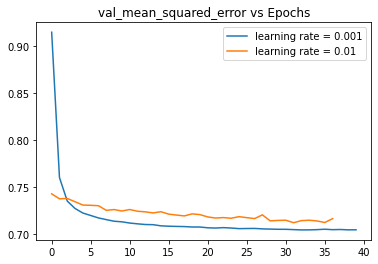

In [86]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_21.history['val_mean_squared_error'], label='learning rate = 0.001')
plt.plot(R_training_22.history['val_mean_squared_error'], label='learning rate = 0.01')
plt.legend()
plt.show()

#### theerten model

In [88]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_23 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.01), 'relu', 5)
R_training_23 = R_model_23.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=50, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])


53424 10000 31
53424 10000 31
Epoch 1/50
1868/1868 [==============================] - 82s 24ms/step - loss: 1.0886 - mean_squared_error: 1.0374 - val_loss: 0.9839 - val_mean_squared_error: 0.9746
Epoch 2/50
1868/1868 [==============================] - 37s 20ms/step - loss: 0.9155 - mean_squared_error: 0.9067 - val_loss: 0.8035 - val_mean_squared_error: 0.7934
Epoch 3/50
1868/1868 [==============================] - 37s 20ms/step - loss: 0.7538 - mean_squared_error: 0.7422 - val_loss: 0.7565 - val_mean_squared_error: 0.7451
Epoch 4/50
1868/1868 [==============================] - 36s 19ms/step - loss: 0.7136 - mean_squared_error: 0.7007 - val_loss: 0.7436 - val_mean_squared_error: 0.7313
Epoch 5/50
1868/1868 [==============================] - 34s 18ms/step - loss: 0.6960 - mean_squared_error: 0.6824 - val_loss: 0.7392 - val_mean_squared_error: 0.7261
Epoch 6/50
1868/1868 [==============================] - 35s 19ms/step - loss: 0.6858 - mean_squared_error: 0.6717 - val_loss: 0.7351 - val_m

37353/37353 [==============================] - 104s 3ms/step - loss: 0.7197 - mean_squared_error: 0.7022


No handles with labels found to put in legend.


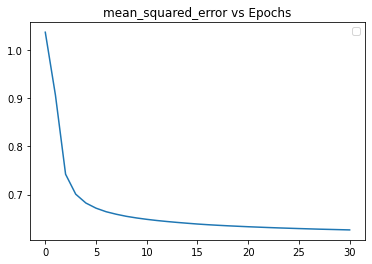

No handles with labels found to put in legend.


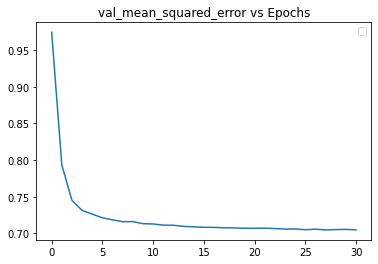

In [89]:
R_model_23.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_23.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_23.history['val_mean_squared_error']) 
plt.legend()
plt.show()

#### forteen model

In [91]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_24 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.01), 'sigmoid', 5)
R_training_24 = R_model_24.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=50, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])


53424 10000 31
53424 10000 31
Epoch 1/50
1868/1868 [==============================] - 71s 25ms/step - loss: 0.9626 - mean_squared_error: 0.8872 - val_loss: 0.7843 - val_mean_squared_error: 0.7431
Epoch 2/50
1868/1868 [==============================] - 42s 22ms/step - loss: 0.7684 - mean_squared_error: 0.7313 - val_loss: 0.7676 - val_mean_squared_error: 0.7347
Epoch 3/50
1868/1868 [==============================] - 38s 20ms/step - loss: 0.7310 - mean_squared_error: 0.7001 - val_loss: 0.7563 - val_mean_squared_error: 0.7288
Epoch 4/50
1868/1868 [==============================] - 42s 22ms/step - loss: 0.6990 - mean_squared_error: 0.6713 - val_loss: 0.7552 - val_mean_squared_error: 0.7291
Epoch 5/50
1868/1868 [==============================] - 40s 21ms/step - loss: 0.6829 - mean_squared_error: 0.6573 - val_loss: 0.7552 - val_mean_squared_error: 0.7312
Epoch 6/50
1868/1868 [==============================] - 38s 21ms/step - loss: 0.6731 - mean_squared_error: 0.6489 - val_loss: 0.7476 - val_m

37353/37353 [==============================] - 376s 10ms/step - loss: 0.7301 - mean_squared_error: 0.7112


No handles with labels found to put in legend.


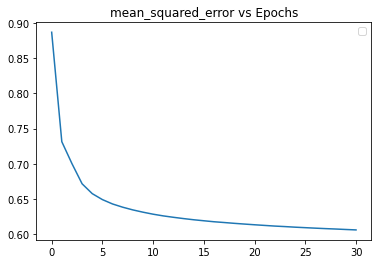

No handles with labels found to put in legend.


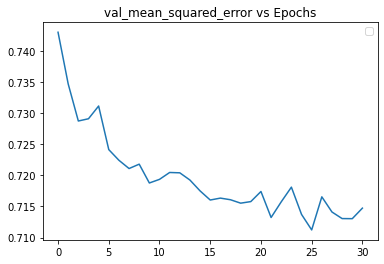

In [92]:
R_model_24.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_24.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_24.history['val_mean_squared_error']) 
plt.legend()
plt.show()

#### fifteen model

In [93]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_25 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.01), 'tanh', 5)
R_training_25 = R_model_25.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=50, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])


53424 10000 31
53424 10000 31
Epoch 1/50
1868/1868 [==============================] - 58s 20ms/step - loss: 0.8855 - mean_squared_error: 0.8132 - val_loss: 0.7685 - val_mean_squared_error: 0.7452
Epoch 2/50
1868/1868 [==============================] - 35s 19ms/step - loss: 0.7546 - mean_squared_error: 0.7356 - val_loss: 0.7584 - val_mean_squared_error: 0.7429
Epoch 3/50
1868/1868 [==============================] - 37s 20ms/step - loss: 0.7298 - mean_squared_error: 0.7156 - val_loss: 0.7449 - val_mean_squared_error: 0.7326
Epoch 4/50
1868/1868 [==============================] - 44s 24ms/step - loss: 0.6958 - mean_squared_error: 0.6830 - val_loss: 0.7397 - val_mean_squared_error: 0.7285
Epoch 5/50
1868/1868 [==============================] - 37s 20ms/step - loss: 0.6766 - mean_squared_error: 0.6645 - val_loss: 0.7352 - val_mean_squared_error: 0.7240
Epoch 6/50
1868/1868 [==============================] - 36s 19ms/step - loss: 0.6656 - mean_squared_error: 0.6538 - val_loss: 0.7339 - val_m

37353/37353 [==============================] - 103s 3ms/step - loss: 0.7222 - mean_squared_error: 0.7080


No handles with labels found to put in legend.


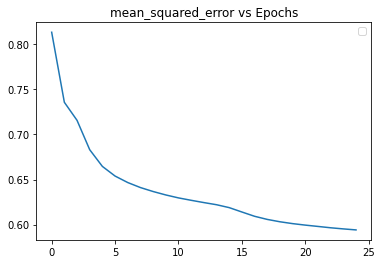

No handles with labels found to put in legend.


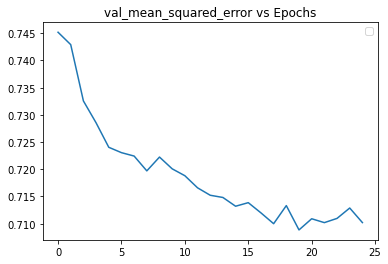

In [94]:
R_model_25.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_25.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_25.history['val_mean_squared_error']) 
plt.legend()
plt.show()

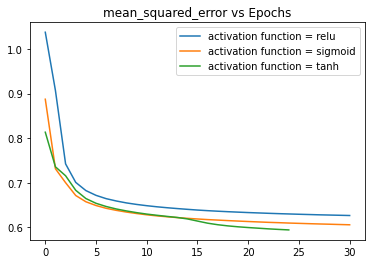

In [96]:
plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_23.history['mean_squared_error'], label='activation function = relu') 
plt.plot(R_training_24.history['mean_squared_error'], label='activation function = sigmoid')
plt.plot(R_training_25.history['mean_squared_error'], label='activation function = tanh')
plt.legend()
plt.show()

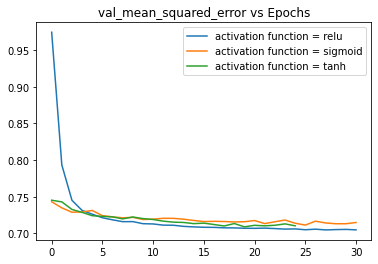

In [95]:
plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_23.history['val_mean_squared_error'], label='activation function = relu') 
plt.plot(R_training_24.history['val_mean_squared_error'], label='activation function = sigmoid')
plt.plot(R_training_25.history['val_mean_squared_error'], label='activation function = tanh')
plt.legend()
plt.show()

### Automated hyperparameter tunning

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test  = train_test_split(features, target ,random_state=104, test_size=0.1, shuffle=True)
X_train, X_val,y_train, y_val  = train_test_split(X_train, y_train ,random_state=104, test_size=0.2, shuffle=True)

X_train.shape, X_test.shape,y_train.shape, y_test.shape, X_val.shape, y_test.shape

((4303064, 34), (597648, 34), (4303064,), (597648,), (1075767, 34), (597648,))

In [56]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape, X_val.shape, y_val.shape

((4303064, 34), (597648, 34), (4303064,), (597648,), (1075767, 34), (1075767,))

In [57]:
usr, prd = len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)

#### try different hyperparameters

In [59]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
h_models = []
for epochs in [60, 70]:
    for embeddings_size in [5, 10, 20]:
        for learn_rate in [0.001, 0.0001, 0.01]:
            for activation in ['sigmoid', 'relu', 'tanh']:
                print({"epochs":epochs, "embeddings_size":embeddings_size, "learn_rate":learn_rate, "activation": activation})
                model = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=learn_rate), activation, embeddings_size)
                training = model.fit(x=[X_val["user_id"], X_val["product"], X_val[books_genres]], y=y_val, epochs=epochs, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])
                h_models.append({"model_t":training, "model":model, "epochs":epochs, "embeddings_size":embeddings_size, "learn_rate":learn_rate, "activation": activation})

{'epochs': 60, 'embeddings_size': 5, 'learn_rate': 0.001, 'activation': 'sigmoid'}
53424 10000 31
Epoch 1/60
421/421 [==============================] - 20s 30ms/step - loss: 2.2650 - mean_squared_error: 1.8437 - val_loss: 1.2352 - val_mean_squared_error: 1.0110
Epoch 2/60
421/421 [==============================] - 13s 31ms/step - loss: 1.1387 - mean_squared_error: 0.9908 - val_loss: 1.0846 - val_mean_squared_error: 0.9876
Epoch 3/60
421/421 [==============================] - 17s 39ms/step - loss: 0.9885 - mean_squared_error: 0.9141 - val_loss: 1.0604 - val_mean_squared_error: 1.0036
Epoch 4/60
421/421 [==============================] - 17s 40ms/step - loss: 0.8623 - mean_squared_error: 0.8123 - val_loss: 1.0654 - val_mean_squared_error: 1.0220
Epoch 5/60
421/421 [==============================] - 17s 41ms/step - loss: 0.7751 - mean_squared_error: 0.7334 - val_loss: 1.0606 - val_mean_squared_error: 1.0219
Epoch 6/60
421/421 [==============================] - 11s 26ms/step - loss: 0.7177

Epoch 7/60
421/421 [==============================] - 10s 24ms/step - loss: 0.6391 - mean_squared_error: 0.5213 - val_loss: 1.0202 - val_mean_squared_error: 0.9124
Epoch 8/60
421/421 [==============================] - 10s 25ms/step - loss: 0.6099 - mean_squared_error: 0.5074 - val_loss: 1.0177 - val_mean_squared_error: 0.9228
Epoch 9/60
421/421 [==============================] - 11s 25ms/step - loss: 0.5882 - mean_squared_error: 0.4970 - val_loss: 1.0195 - val_mean_squared_error: 0.9343
Epoch 10/60
421/421 [==============================] - 11s 27ms/step - loss: 0.5717 - mean_squared_error: 0.4888 - val_loss: 1.0186 - val_mean_squared_error: 0.9407
Epoch 11/60
421/421 [==============================] - 10s 24ms/step - loss: 0.5587 - mean_squared_error: 0.4823 - val_loss: 1.0238 - val_mean_squared_error: 0.9515
Epoch 12/60
421/421 [==============================] - 10s 24ms/step - loss: 0.5484 - mean_squared_error: 0.4768 - val_loss: 1.0251 - val_mean_squared_error: 0.9570
Epoch 13/60
4

421/421 [==============================] - 8s 18ms/step - loss: 0.5886 - mean_squared_error: 0.5068 - val_loss: 1.0414 - val_mean_squared_error: 0.9607
Epoch 32: early stopping
{'epochs': 60, 'embeddings_size': 5, 'learn_rate': 0.0001, 'activation': 'tanh'}
53424 10000 31
Epoch 1/60
421/421 [==============================] - 20s 29ms/step - loss: 12.9203 - mean_squared_error: 12.2327 - val_loss: 7.8202 - val_mean_squared_error: 7.1340
Epoch 2/60
421/421 [==============================] - 10s 24ms/step - loss: 5.0738 - mean_squared_error: 4.3902 - val_loss: 3.2596 - val_mean_squared_error: 2.5819
Epoch 3/60
421/421 [==============================] - 7s 18ms/step - loss: 2.6302 - mean_squared_error: 1.9665 - val_loss: 2.2703 - val_mean_squared_error: 1.6242
Epoch 4/60
421/421 [==============================] - 8s 19ms/step - loss: 2.1311 - mean_squared_error: 1.5061 - val_loss: 2.0229 - val_mean_squared_error: 1.4197
Epoch 5/60
421/421 [==============================] - 7s 18ms/step - lo

Epoch 7/60
421/421 [==============================] - 8s 18ms/step - loss: 0.6226 - mean_squared_error: 0.6009 - val_loss: 0.9693 - val_mean_squared_error: 0.9500
Epoch 8/60
421/421 [==============================] - 8s 18ms/step - loss: 0.6062 - mean_squared_error: 0.5841 - val_loss: 0.9797 - val_mean_squared_error: 0.9595
Epoch 9/60
421/421 [==============================] - 8s 18ms/step - loss: 0.5946 - mean_squared_error: 0.5720 - val_loss: 0.9857 - val_mean_squared_error: 0.9654
Epoch 9: early stopping
{'epochs': 60, 'embeddings_size': 5, 'learn_rate': 0.01, 'activation': 'tanh'}
53424 10000 31
Epoch 1/60
421/421 [==============================] - 19s 27ms/step - loss: 1.1849 - mean_squared_error: 0.9852 - val_loss: 0.8516 - val_mean_squared_error: 0.7822
Epoch 2/60
421/421 [==============================] - 11s 25ms/step - loss: 0.7901 - mean_squared_error: 0.7394 - val_loss: 0.8060 - val_mean_squared_error: 0.7679
Epoch 3/60
421/421 [==============================] - 11s 26ms/st

{'epochs': 60, 'embeddings_size': 10, 'learn_rate': 0.0001, 'activation': 'tanh'}
53424 10000 31
Epoch 1/60
421/421 [==============================] - 24s 40ms/step - loss: 8.6765 - mean_squared_error: 7.8752 - val_loss: 5.0021 - val_mean_squared_error: 4.2047
Epoch 2/60
421/421 [==============================] - 14s 34ms/step - loss: 3.3624 - mean_squared_error: 2.5712 - val_loss: 2.4277 - val_mean_squared_error: 1.6493
Epoch 3/60
421/421 [==============================] - 14s 34ms/step - loss: 2.1769 - mean_squared_error: 1.4233 - val_loss: 2.0193 - val_mean_squared_error: 1.2941
Epoch 4/60
421/421 [==============================] - 14s 34ms/step - loss: 1.9124 - mean_squared_error: 1.2163 - val_loss: 1.8306 - val_mean_squared_error: 1.1630
Epoch 5/60
421/421 [==============================] - 15s 35ms/step - loss: 1.7287 - mean_squared_error: 1.0866 - val_loss: 1.6828 - val_mean_squared_error: 1.0657
Epoch 6/60
421/421 [==============================] - 14s 33ms/step - loss: 1.5746 

421/421 [==============================] - 12s 27ms/step - loss: 0.4826 - mean_squared_error: 0.4410 - val_loss: 0.9680 - val_mean_squared_error: 0.9305
Epoch 6/60
421/421 [==============================] - 12s 28ms/step - loss: 0.4352 - mean_squared_error: 0.3914 - val_loss: 1.0081 - val_mean_squared_error: 0.9689
Epoch 7/60
421/421 [==============================] - 12s 28ms/step - loss: 0.4058 - mean_squared_error: 0.3605 - val_loss: 1.0447 - val_mean_squared_error: 1.0040
Epoch 7: early stopping
{'epochs': 60, 'embeddings_size': 20, 'learn_rate': 0.001, 'activation': 'sigmoid'}
53424 10000 31
Epoch 1/60
421/421 [==============================] - 31s 58ms/step - loss: 2.6486 - mean_squared_error: 2.1194 - val_loss: 1.2642 - val_mean_squared_error: 0.9876
Epoch 2/60
421/421 [==============================] - 24s 56ms/step - loss: 1.1240 - mean_squared_error: 0.9198 - val_loss: 1.0490 - val_mean_squared_error: 0.8903
Epoch 3/60
421/421 [==============================] - 23s 54ms/step 

Epoch 21/60
421/421 [==============================] - 24s 57ms/step - loss: 0.5631 - mean_squared_error: 0.4787 - val_loss: 0.9497 - val_mean_squared_error: 0.8665
Epoch 22/60
421/421 [==============================] - 24s 56ms/step - loss: 0.5406 - mean_squared_error: 0.4586 - val_loss: 0.9450 - val_mean_squared_error: 0.8634
Epoch 23/60
421/421 [==============================] - 24s 58ms/step - loss: 0.5201 - mean_squared_error: 0.4396 - val_loss: 0.9410 - val_mean_squared_error: 0.8607
Epoch 24/60
421/421 [==============================] - 24s 57ms/step - loss: 0.5013 - mean_squared_error: 0.4219 - val_loss: 0.9397 - val_mean_squared_error: 0.8610
Epoch 25/60
421/421 [==============================] - 22s 53ms/step - loss: 0.4840 - mean_squared_error: 0.4054 - val_loss: 0.9379 - val_mean_squared_error: 0.8595
Epoch 26/60
421/421 [==============================] - 23s 54ms/step - loss: 0.4680 - mean_squared_error: 0.3899 - val_loss: 0.9381 - val_mean_squared_error: 0.8599
Epoch 27/6

Epoch 5/70
421/421 [==============================] - 7s 18ms/step - loss: 0.8053 - mean_squared_error: 0.7274 - val_loss: 1.0524 - val_mean_squared_error: 0.9829
Epoch 6/70
421/421 [==============================] - 7s 18ms/step - loss: 0.7247 - mean_squared_error: 0.6595 - val_loss: 1.0312 - val_mean_squared_error: 0.9712
Epoch 7/70
421/421 [==============================] - 8s 18ms/step - loss: 0.6752 - mean_squared_error: 0.6172 - val_loss: 1.0185 - val_mean_squared_error: 0.9634
Epoch 8/70
421/421 [==============================] - 8s 18ms/step - loss: 0.6432 - mean_squared_error: 0.5890 - val_loss: 1.0094 - val_mean_squared_error: 0.9574
Epoch 9/70
421/421 [==============================] - 8s 18ms/step - loss: 0.6211 - mean_squared_error: 0.5689 - val_loss: 1.0056 - val_mean_squared_error: 0.9546
Epoch 10/70
421/421 [==============================] - 7s 18ms/step - loss: 0.6050 - mean_squared_error: 0.5539 - val_loss: 1.0031 - val_mean_squared_error: 0.9527
Epoch 11/70
421/421 [

Epoch 11/70
421/421 [==============================] - 7s 18ms/step - loss: 1.1550 - mean_squared_error: 0.9182 - val_loss: 1.2561 - val_mean_squared_error: 1.0353
Epoch 12/70
421/421 [==============================] - 8s 18ms/step - loss: 1.1003 - mean_squared_error: 0.8943 - val_loss: 1.2272 - val_mean_squared_error: 1.0354
Epoch 13/70
421/421 [==============================] - 8s 18ms/step - loss: 1.0502 - mean_squared_error: 0.8715 - val_loss: 1.2020 - val_mean_squared_error: 1.0359
Epoch 14/70
421/421 [==============================] - 8s 19ms/step - loss: 1.0045 - mean_squared_error: 0.8499 - val_loss: 1.1805 - val_mean_squared_error: 1.0370
Epoch 15/70
421/421 [==============================] - 7s 18ms/step - loss: 0.9629 - mean_squared_error: 0.8294 - val_loss: 1.1621 - val_mean_squared_error: 1.0382
Epoch 16/70
421/421 [==============================] - 7s 18ms/step - loss: 0.9250 - mean_squared_error: 0.8099 - val_loss: 1.1465 - val_mean_squared_error: 1.0397
Epoch 17/70
421/

421/421 [==============================] - 7s 18ms/step - loss: 0.5678 - mean_squared_error: 0.5215 - val_loss: 0.9371 - val_mean_squared_error: 0.8925
Epoch 7: early stopping
{'epochs': 70, 'embeddings_size': 5, 'learn_rate': 0.01, 'activation': 'relu'}
53424 10000 31
Epoch 1/70
421/421 [==============================] - 19s 28ms/step - loss: 1.3271 - mean_squared_error: 1.1242 - val_loss: 0.8479 - val_mean_squared_error: 0.7831
Epoch 2/70
421/421 [==============================] - 10s 25ms/step - loss: 0.7875 - mean_squared_error: 0.7431 - val_loss: 0.8026 - val_mean_squared_error: 0.7712
Epoch 3/70
421/421 [==============================] - 7s 18ms/step - loss: 0.7269 - mean_squared_error: 0.6983 - val_loss: 0.8041 - val_mean_squared_error: 0.7798
Epoch 4/70
421/421 [==============================] - 7s 17ms/step - loss: 0.6585 - mean_squared_error: 0.6333 - val_loss: 0.8374 - val_mean_squared_error: 0.8160
Epoch 5/70
421/421 [==============================] - 7s 18ms/step - loss: 0

421/421 [==============================] - 12s 27ms/step - loss: 0.6494 - mean_squared_error: 0.4967 - val_loss: 1.0476 - val_mean_squared_error: 0.9025
Epoch 21/70
421/421 [==============================] - 12s 27ms/step - loss: 0.6175 - mean_squared_error: 0.4794 - val_loss: 1.0383 - val_mean_squared_error: 0.9065
Epoch 22/70
421/421 [==============================] - 12s 27ms/step - loss: 0.5893 - mean_squared_error: 0.4633 - val_loss: 1.0321 - val_mean_squared_error: 0.9116
Epoch 23/70
421/421 [==============================] - 12s 27ms/step - loss: 0.5644 - mean_squared_error: 0.4488 - val_loss: 1.0289 - val_mean_squared_error: 0.9179
Epoch 24/70
421/421 [==============================] - 12s 28ms/step - loss: 0.5423 - mean_squared_error: 0.4352 - val_loss: 1.0280 - val_mean_squared_error: 0.9247
Epoch 25/70
421/421 [==============================] - 12s 28ms/step - loss: 0.5228 - mean_squared_error: 0.4226 - val_loss: 1.0291 - val_mean_squared_error: 0.9321
Epoch 26/70
421/421 [=

421/421 [==============================] - 23s 54ms/step - loss: 1.4101 - mean_squared_error: 0.9560 - val_loss: 1.4386 - val_mean_squared_error: 1.0168
Epoch 9/70
421/421 [==============================] - 23s 55ms/step - loss: 1.3113 - mean_squared_error: 0.9183 - val_loss: 1.3693 - val_mean_squared_error: 1.0037
Epoch 10/70
421/421 [==============================] - 23s 54ms/step - loss: 1.2220 - mean_squared_error: 0.8808 - val_loss: 1.3108 - val_mean_squared_error: 0.9930
Epoch 11/70
421/421 [==============================] - 23s 56ms/step - loss: 1.1400 - mean_squared_error: 0.8432 - val_loss: 1.2603 - val_mean_squared_error: 0.9836
Epoch 12/70
421/421 [==============================] - 23s 54ms/step - loss: 1.0645 - mean_squared_error: 0.8058 - val_loss: 1.2160 - val_mean_squared_error: 0.9746
Epoch 13/70
421/421 [==============================] - 23s 54ms/step - loss: 0.9949 - mean_squared_error: 0.7688 - val_loss: 1.1767 - val_mean_squared_error: 0.9652
Epoch 14/70
421/421 [==

421/421 [==============================] - 23s 53ms/step - loss: 0.4584 - mean_squared_error: 0.3386 - val_loss: 0.9773 - val_mean_squared_error: 0.8610
Epoch 24/70
421/421 [==============================] - 24s 57ms/step - loss: 0.4381 - mean_squared_error: 0.3248 - val_loss: 0.9767 - val_mean_squared_error: 0.8664
Epoch 25/70
421/421 [==============================] - 23s 55ms/step - loss: 0.4197 - mean_squared_error: 0.3118 - val_loss: 0.9761 - val_mean_squared_error: 0.8704
Epoch 26/70
421/421 [==============================] - 23s 55ms/step - loss: 0.4029 - mean_squared_error: 0.2994 - val_loss: 0.9773 - val_mean_squared_error: 0.8757
Epoch 27/70
421/421 [==============================] - 23s 54ms/step - loss: 0.3876 - mean_squared_error: 0.2878 - val_loss: 0.9790 - val_mean_squared_error: 0.8809
Epoch 28/70
421/421 [==============================] - 23s 55ms/step - loss: 0.3736 - mean_squared_error: 0.2768 - val_loss: 0.9819 - val_mean_squared_error: 0.8864
Epoch 29/70
421/421 [=

#### get best hyperparamters

In [60]:
# 'epochs': 60, 'embeddings_size': 10, 'learn_rate': 0.01, 'activation': 'sigmoid'
best_model = h_models[0]['model_t']
best_model_info = h_models[0]
for i in range(len(h_models)):
    i_l = len(h_models[i]['model_t'].history['val_mean_squared_error'])
    b_l = len(best_model.history['mean_squared_error'])
    if  (h_models[i]['model_t'].history['val_mean_squared_error'][i_l - 1] < best_model.history['val_mean_squared_error'][b_l - 1]):
        best_model = h_models[i]['model_t']
        best_model_info = h_models[i]
best_model_info

{'model_t': <keras.callbacks.History at 0x26f54b9ea48>,
 'model': <keras.engine.functional.Functional at 0x26f54b7a788>,
 'epochs': 70,
 'embeddings_size': 20,
 'learn_rate': 0.0001,
 'activation': 'tanh'}

In [66]:
epochs= best_model_info['epochs']
embeddings_size = best_model_info['embeddings_size']
learn_rate = best_model_info['learn_rate']
activation = best_model_info['activation']
print(epochs, embeddings_size, learn_rate, activation)


70 20 0.0001 tanh


In [63]:
best_model_info['model_t'].history['mean_squared_error']

best_model_info['model_t'].history['val_mean_squared_error']



[6.186883449554443,
 1.832656741142273,
 1.2107176780700684,
 1.0577729940414429,
 0.9744469523429871,
 0.9215371608734131,
 0.8833732008934021,
 0.8545655608177185,
 0.8346656560897827,
 0.8223748803138733,
 0.8150968551635742,
 0.8110589385032654,
 0.8086721897125244,
 0.8080776333808899,
 0.8091011047363281,
 0.80948805809021,
 0.811211884021759,
 0.8137612342834473,
 0.8160099983215332,
 0.8178984522819519,
 0.8216206431388855,
 0.8241574764251709,
 0.8279656171798706,
 0.8317078351974487,
 0.8358801007270813,
 0.8406449556350708,
 0.8443055748939514,
 0.8485474586486816,
 0.8531945943832397,
 0.8573499917984009]

In [64]:
best_model_info['model'].evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

18677/18677 [==============================] - 40s 2ms/step - loss: 0.9487 - mean_squared_error: 0.8598


[0.9486992955207825, 0.8597756028175354]

In [65]:
len(best_model_info['model_t'].history['val_mean_squared_error'])

30

#### train using best hyperparamters

In [67]:
print(epochs, embeddings_size, learn_rate, activation)
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_5 = create_model(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=learn_rate), activation, embeddings_size)
R_training_5 = R_model_5.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=epochs, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

70 20 0.0001 tanh
53424 10000 31
53424 10000 31
Epoch 1/70
1681/1681 [==============================] - 107s 55ms/step - loss: 3.1985 - mean_squared_error: 3.1985 - val_loss: 0.9597 - val_mean_squared_error: 0.9597
Epoch 2/70
1681/1681 [==============================] - 83s 49ms/step - loss: 0.8229 - mean_squared_error: 0.8229 - val_loss: 0.7603 - val_mean_squared_error: 0.7603
Epoch 3/70
1681/1681 [==============================] - 85s 50ms/step - loss: 0.7246 - mean_squared_error: 0.7246 - val_loss: 0.7416 - val_mean_squared_error: 0.7416
Epoch 4/70
1681/1681 [==============================] - 83s 49ms/step - loss: 0.6959 - mean_squared_error: 0.6959 - val_loss: 0.7437 - val_mean_squared_error: 0.7437
Epoch 5/70
1681/1681 [==============================] - 83s 49ms/step - loss: 0.6680 - mean_squared_error: 0.6680 - val_loss: 0.7492 - val_mean_squared_error: 0.7492
Epoch 6/70
1681/1681 [==============================] - 84s 50ms/step - loss: 0.6393 - mean_squared_error: 0.6393 - val_l

In [71]:
print(epochs, embeddings_size, learn_rate, activation)
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_14 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=learn_rate), activation, embeddings_size)
R_training_14 = R_model_14.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=epochs, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

70 20 0.0001 tanh
53424 10000 31
53424 10000 31
Epoch 1/70
1681/1681 [==============================] - 103s 52ms/step - loss: 5.3592 - mean_squared_error: 4.5614 - val_loss: 1.7782 - val_mean_squared_error: 1.0490
Epoch 2/70
1681/1681 [==============================] - 81s 48ms/step - loss: 1.5333 - mean_squared_error: 0.9160 - val_loss: 1.3553 - val_mean_squared_error: 0.8404
Epoch 3/70
1681/1681 [==============================] - 91s 54ms/step - loss: 1.2097 - mean_squared_error: 0.7794 - val_loss: 1.1174 - val_mean_squared_error: 0.7677
Epoch 4/70
1681/1681 [==============================] - 105s 63ms/step - loss: 1.0060 - mean_squared_error: 0.7204 - val_loss: 0.9829 - val_mean_squared_error: 0.7535
Epoch 5/70
1681/1681 [==============================] - 85s 51ms/step - loss: 0.8739 - mean_squared_error: 0.6842 - val_loss: 0.9082 - val_mean_squared_error: 0.7528
Epoch 6/70
1681/1681 [==============================] - 84s 50ms/step - loss: 0.7859 - mean_squared_error: 0.6527 - val_

KeyboardInterrupt: 

**stop it becuase there is signs for overfitting**

In [ ]:
R_model_14.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_14.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_14.history['val_mean_squared_error']) 
plt.legend()
plt.show()

In [68]:
print(epochs, embeddings_size, learn_rate, activation)
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_13 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=learn_rate), activation, embeddings_size)
R_training_13 = R_model_13.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=epochs, batch_size=2048, verbose=1, validation_split=0.2)

70 20 0.0001 tanh
53424 10000 31
53424 10000 31
Epoch 1/70
1681/1681 [==============================] - 91s 49ms/step - loss: 4.6052 - mean_squared_error: 3.8025 - val_loss: 1.7420 - val_mean_squared_error: 1.0347
Epoch 2/70
1681/1681 [==============================] - 81s 48ms/step - loss: 1.4974 - mean_squared_error: 0.9081 - val_loss: 1.3140 - val_mean_squared_error: 0.8306
Epoch 3/70
1681/1681 [==============================] - 87s 52ms/step - loss: 1.1674 - mean_squared_error: 0.7716 - val_loss: 1.0791 - val_mean_squared_error: 0.7653
Epoch 4/70
1681/1681 [==============================] - 88s 52ms/step - loss: 0.9691 - mean_squared_error: 0.7164 - val_loss: 0.9537 - val_mean_squared_error: 0.7531
Epoch 5/70
1681/1681 [==============================] - 89s 53ms/step - loss: 0.8466 - mean_squared_error: 0.6808 - val_loss: 0.8898 - val_mean_squared_error: 0.7528
Epoch 6/70
1681/1681 [==============================] - 87s 52ms/step - loss: 0.7686 - mean_squared_error: 0.6495 - val_lo

KeyboardInterrupt: 

**stop it becuase there is signs for overfitting**

In [70]:
R_model_13.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

18677/18677 [==============================] - 40s 2ms/step - loss: 0.8578 - mean_squared_error: 0.7782


[0.8578014373779297, 0.7782203555107117]

#### retrain

In [74]:
print(epochs, embeddings_size, learn_rate, activation)
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
usr, prd =len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)
print(usr, prd, feat)
R_model_15 = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=learn_rate), activation, 5)
R_training_15 = R_model_14.fit(x=[X_train["user_id"], X_train["product"], X_train[books_genres]], y=y_train, epochs=epochs, batch_size=2048, verbose=1, validation_split=0.2, callbacks=[early_stopping])

70 20 0.0001 tanh
53424 10000 31
53424 10000 31
Epoch 1/70
1681/1681 [==============================] - 104s 58ms/step - loss: 0.5257 - mean_squared_error: 0.4491 - val_loss: 0.8723 - val_mean_squared_error: 0.7969
Epoch 2/70
1681/1681 [==============================] - 93s 55ms/step - loss: 0.5205 - mean_squared_error: 0.4443 - val_loss: 0.8726 - val_mean_squared_error: 0.7976
Epoch 3/70
1681/1681 [==============================] - 90s 53ms/step - loss: 0.5159 - mean_squared_error: 0.4399 - val_loss: 0.8725 - val_mean_squared_error: 0.7977
Epoch 4/70
1681/1681 [==============================] - 85s 51ms/step - loss: 0.5117 - mean_squared_error: 0.4359 - val_loss: 0.8723 - val_mean_squared_error: 0.7978
Epoch 5/70
1681/1681 [==============================] - 87s 52ms/step - loss: 0.5079 - mean_squared_error: 0.4323 - val_loss: 0.8722 - val_mean_squared_error: 0.7980
Epoch 6/70
1681/1681 [==============================] - 87s 52ms/step - loss: 0.5044 - mean_squared_error: 0.4290 - val_l

18677/18677 [==============================] - 62s 3ms/step - loss: 18.8810 - mean_squared_error: 18.1648


No handles with labels found to put in legend.


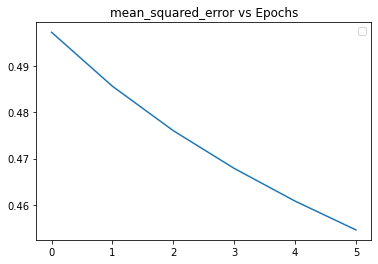

No handles with labels found to put in legend.


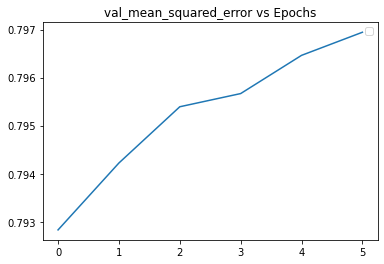

In [73]:
R_model_15.evaluate([X_test["user_id"], X_test["product"], X_test[books_genres]], y_test)

plt.title('mean_squared_error vs Epochs')
plt.plot(R_training_15.history['mean_squared_error']) 
plt.legend()
plt.show()

plt.title('val_mean_squared_error vs Epochs')
plt.plot(R_training_15.history['val_mean_squared_error']) 
plt.legend()
plt.show()

**overfitting occurs**

## 5-Fold

In [49]:
usr, prd = len(dtf_users["user_id"].unique()), len(dtf_users["product"].unique())
feat = len(books_genres)

In [50]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#set early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

#define the model checkpoint callback -> this will keep on saving the model as a physical file
model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

#define a function to fit the model
def fit_and_evaluate(train, val, EPOCHS=20, BATCH_SIZE=128):
    model = create_model_with_reg(usr, prd, feat, tf.keras.optimizers.Adam(learning_rate=0.0001), 'sigmoid', 5)
    results = model.fit(x= [train["user_id"], train["product"], train[books_genres]], y = train["y"], epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True, callbacks=[early_stopping, model_checkpoint], 
              verbose=1, validation_split=0.2)  
    loss, mae =  model.evaluate([val["user_id"], val["product"], val[books_genres]], val["y"])
    return results, loss, mae

In [51]:
users_col = dtf_users.columns
data = dtf_users.values
data

array([[    0,   257,     5, ...,     0,     0,     1],
       [   10,   257,     3, ...,     0,     0,     1],
       [  142,   257,     4, ...,     0,     0,     1],
       ...,
       [45212,  9547,     3, ...,     0,     0,     1],
       [12871,  9547,     4, ...,     0,     0,     1],
       [46352,  9547,     5, ...,     0,     0,     1]], dtype=int64)

In [52]:
data[0].shape

(35,)

In [53]:
#save the model history in a list after fitting so that we can plot later
model_history = [] 
from sklearn.model_selection import KFold
# prepare cross validation
kfold = KFold(n_splits=5, shuffle=True, random_state=1)
# enumerate splits
i = 0
for ktrain, kval in kfold.split(data):
    print("Training on Fold: ",i+1)
    ktrain = data[ktrain]
    kval = data[kval]
    print('train: %s, val: %s' % (ktrain.shape, kval.shape))
    model_history.append(fit_and_evaluate(pd.DataFrame(ktrain, columns = users_col), pd.DataFrame(kval, columns = users_col), 60, 2048))
    print("======="*12, end="\n\n\n")
    i = i + 1

Training on Fold:  1
train: (4781183, 35), val: (1195296, 35)
53424 10000 31
Epoch 1/60
1866/1868 [============================>.] - ETA: 0s - loss: 8.6300 - mean_squared_error: 7.9814
Epoch 1: val_loss improved from inf to 2.52442, saving model to fas_mnist_1.h5
1868/1868 [==============================] - 62s 24ms/step - loss: 8.6245 - mean_squared_error: 7.9759 - val_loss: 2.5244 - val_mean_squared_error: 1.9274
Epoch 2/60
1867/1868 [============================>.] - ETA: 0s - loss: 1.7264 - mean_squared_error: 1.2432
Epoch 2: val_loss improved from 2.52442 to 1.43089, saving model to fas_mnist_1.h5
1868/1868 [==============================] - 38s 20ms/step - loss: 1.7263 - mean_squared_error: 1.2431 - val_loss: 1.4309 - val_mean_squared_error: 1.0643
Epoch 3/60
1866/1868 [============================>.] - ETA: 0s - loss: 1.3299 - mean_squared_error: 1.0542
Epoch 3: val_loss improved from 1.43089 to 1.19600, saving model to fas_mnist_1.h5
1868/1868 [==============================] -

Epoch 6/60
1868/1868 [==============================] - ETA: 0s - loss: 0.8711 - mean_squared_error: 0.8215
Epoch 6: val_loss did not improve from 1.06244
1868/1868 [==============================] - 43s 23ms/step - loss: 0.8711 - mean_squared_error: 0.8215 - val_loss: 1.1152 - val_mean_squared_error: 1.0740
Epoch 7/60
1867/1868 [============================>.] - ETA: 0s - loss: 0.8086 - mean_squared_error: 0.7709
Epoch 7: val_loss did not improve from 1.06244
1868/1868 [==============================] - 38s 20ms/step - loss: 0.8086 - mean_squared_error: 0.7709 - val_loss: 1.1470 - val_mean_squared_error: 1.1114
Epoch 8/60
1867/1868 [============================>.] - ETA: 0s - loss: 0.7749 - mean_squared_error: 0.7402
Epoch 8: val_loss did not improve from 1.06244
1868/1868 [==============================] - 41s 22ms/step - loss: 0.7749 - mean_squared_error: 0.7402 - val_loss: 1.1763 - val_mean_squared_error: 1.1424
Epoch 9/60
1867/1868 [============================>.] - ETA: 0s - loss

In [55]:
k_len = len(model_history)

In [65]:
model_history[0]

(<keras.callbacks.History at 0x21d1da6ffc8>,
 0.870039701461792,
 0.8392429947853088)

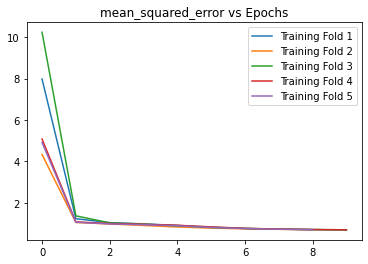

In [56]:
plt.title('mean_squared_error vs Epochs')
for i in range(k_len):
    plt.plot(model_history[i][0].history['mean_squared_error'], label='Training Fold '+str(i+1)) 
plt.legend()
plt.show()

In [70]:
list
for i in range(k_len):
    print(model_history[i][2]

0.8392429947853088
0.8606305718421936
0.8461132645606995
0.8365887403488159
0.8368266224861145


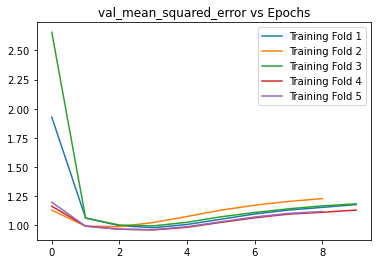

In [71]:
plt.title('val_mean_squared_error vs Epochs')
for i in range(k_len):
    plt.plot(model_history[i][0].history['val_mean_squared_error'], label='Training Fold '+str(i+1)) 
plt.legend()
plt.show()

**there are signs for a very small overfitting**

In [61]:
sum = 0
for i in range(k_len):
    last = len(model_history[i][0].history['mean_squared_error'])
    sum = sum + model_history[i][0].history['mean_squared_error'][last-1]
train_average = sum / len(model_history)
print("train average mean_squared_error: "+ str(train_average))

train average mean_squared_error: 0.7090844750404358


In [63]:
test_sum = 0
for i in range(k_len):
    print('the test mean_squared_error at Training Fold '+str(i+1)+": "+str(model_history[i][1]))
    test_sum = test_sum + model_history[i][1]
print("test average mean_squared_error: "+ str(test_sum/k_len))

the test mean_squared_error at Training Fold 1: 0.870039701461792
the test mean_squared_error at Training Fold 2: 0.8945085406303406
the test mean_squared_error at Training Fold 3: 0.8775931000709534
the test mean_squared_error at Training Fold 4: 0.8726540803909302
the test mean_squared_error at Training Fold 5: 0.8787140250205994
test average mean_squared_error: 0.8787018895149231
